In [2]:
import numpy as np

import pylab
import pandas as pd
from pandas import DataFrame
import sqlite3
import matplotlib.pyplot as plt
import ast
import math
import time
from datetime import datetime
import glob
import sys
import copy
import cv2
from imp import reload
import scipy
from scipy import stats
from scipy.optimize import curve_fit
import csv

In [60]:
#change angle to look at here!!!!
#***************************************
dist = 2
ANGLE= 30
#***************************************
habp = (ANGLE*math.pi/180)/2
habp

0.2617993877991494

In [197]:

directory = '/home/bianca/Documents/github/locustVR/plotting/csv_rot_data'
filename = '/two_post_'+str(ANGLE) +'.csv'

#with open(directory+filename) as csvfile:
df6 = pd.read_csv(directory+filename)
df6.columns = ['index','x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y', 'x_rot','y_rot']




In [285]:
deletor =[]
#get rid of rows with single trial coordinate
for l in range (len(df6)-2):
    if df6['cntr'][l] != df6['cntr'][l+1]:
        # to exclude trials that consist of a single coordinate
        if df6['cntr'][l+1] != df6['cntr'][l+2]:
            #print(df6['cntr'][l],df6['cntr'][l+1],df6['cntr'][l+2])
            #df7=df6.drop(df6.index[l+1])
            #print(l+1)
            deletor.append(l+1)
            


In [203]:
#for i in range(len(deletor)):
#    df7=df6.drop(df6.index[deletor[i]])
#        
df7=df6.drop(df6.index[[deletor]])
#print(deletor)

In [282]:
df7.reset_index()
#df7=df6.drop(df6.index[[203139]])


In [283]:
df6=df7
#deletor[2]
df6.reset_index(drop=True, inplace=True)
df6


index         x         y    z  cntr            t  nStimuli  pos0x  \
0             1 -0.001907  0.000506  0.0   0.0  1950.068343       3.0  -0.00   
1             2 -0.003092  0.000826  0.0   0.0  1950.110276       3.0  -0.00   
2             3 -0.003976  0.001098  0.0   0.0  1950.146753       3.0  -0.00   
3             4 -0.005150  0.001449  0.0   0.0  1950.181044       3.0  -0.00   
4             5 -0.005977  0.001669  0.0   0.0  1950.216890       3.0  -0.00   
5             6 -0.007010  0.001923  0.0   0.0  1950.250543       3.0  -0.00   
6             7 -0.007729  0.002072  0.0   0.0  1950.287638       3.0  -0.00   
7             8 -0.008651  0.002233  0.0   0.0  1950.325561       3.0  -0.00   
8             9 -0.009310  0.002326  0.0   0.0  1950.359229       3.0  -0.00   
9            10 -0.010138  0.002402  0.0   0.0  1950.393585       3.0  -0.00   
10           11 -0.010727  0.002435  0.0   0.0  1950.427473       3.0  -0.00   
11           12 -0.011465  0.002456  0.0   0.0  1950.470902       3.0  -0.00   
12           13 -0.012244  0.002468  0.0   0.0  1950.507849       3.0  -0.00   
13           14 -0.013149  0.002497  0.0   0.0  1950.551068       3.0  -0.00   
14           15 -0.014192  0.002494  0.0   0.0  1950.591400       3.0  -0.00   
15           16 -0.015013  0.002462  0.0   0.0  1950.624654       3.0  -0.00   
16           17 -0.016402  0.002365  0.0   0.0  1950.671215       3.0  -0.00   
17           18 -0.017805  0.002208  0.0   0.0  1950.719001       3.0  -0.00   
18           19 -0.018617  0.002095  0.0   0.0  1950.755440       3.0  -0.00   
19           20 -0.019673  0.001924  0.0   0.0  1950.790918       3.0  -0.00   
20           21 -0.020688  0.001714  0.0   0.0  1950.837936       3.0  -0.00   
21           22 -0.021725  0.001449  0.0   0.0  1950.875632       3.0  -0.00   
22           23 -0.022836  0.001140  0.0   0.0  1950.914612       3.0  -0.00   
23           24 -0.023716  0.000890  0.0   0.0  1950.950789       3.0  -0.00   
24           25 -0.024847  0.000538  0.0   0.0  1950.984347       3.0  -0.00   
25           26 -0.025663  0.000256  0.0   0.0  1951.021071       3.0  -0.00   
26           27 -0.026719 -0.000139  0.0   0.0  1951.057918       3.0  -0.00   
27           28 -0.027494 -0.000465  0.0   0.0  1951.092675       3.0  -0.00   
28           29 -0.028410 -0.000917  0.0   0.0  1951.134748       3.0  -0.00   
29           30 -0.029256 -0.001376  0.0   0.0  1951.175028       3.0  -0.00   
...         ...       ...       ...  ...   ...          ...       ...    ...   
502527  1628703 -1.633485 -1.285976  0.0   0.0   910.869365       2.0  -1.41   
502528  1628704 -1.633092 -1.286721  0.0   0.0   910.912329       2.0  -1.41   
502529  1628705 -1.632814 -1.287313  0.0   0.0   910.947099       2.0  -1.41   
502530  1628706 -1.632681 -1.287663  0.0   0.0   910.976322       2.0  -1.41   
502531  1628707 -1.632601 -1.287948  0.0   0.0   911.007761       2.0  -1.41   
502532  1628708 -1.632560 -1.288196  0.0   0.0   911.039602       2.0  -1.41   
502533  1628709 -1.632557 -1.288337  0.0   0.0   911.066108       2.0  -1.41   
502534  1628710 -1.632577 -1.288530  0.0   0.0   911.095510       2.0  -1.41   
502535  1628711 -1.632624 -1.288653  0.0   0.0   911.127686       2.0  -1.41   
502536  1628712 -1.632696 -1.288731  0.0   0.0   911.155869       2.0  -1.41   
502537  1628713 -1.632782 -1.288775  0.0   0.0   911.185312       2.0  -1.41   
502538  1628714 -1.632872 -1.288789  0.0   0.0   911.216231       2.0  -1.41   
502539  1628715 -1.632964 -1.288781  0.0   0.0   911.248802       2.0  -1.41   
502540  1628716 -1.633058 -1.288752  0.0   0.0   911.279636       2.0  -1.41   
502541  1628717 -1.633186 -1.288667  0.0   0.0   911.313113       2.0  -1.41   
502542  1628718 -1.633267 -1.288614  0.0   0.0   911.346042       2.0  -1.41   
502543  1628719 -1.633352 -1.288567  0.0   0.0   911.375804       2.0  -1.41   
502544  1628720 -1.633422 -1.288511  0.0   0.0   911.405921       2.0  -1.41   
502545  16

In [136]:
print(filename)

/two_post_30.csv


In [58]:
#df6.head(50)
'''
speeds[np.where(speeds<0)[0]] = np.nan
speed_selector = (speeds>0.75)


df6[np.where()['x_rot']]

In [64]:
#post center position
dot_x = math.cos(habp)*dist
dot_y = math.sin(habp)*dist
dot_x

1.9318516525781366

# piece-wise fct


In [79]:
# makes all y values positive

y_fit= np.zeros(len(df6),)
for l in range(len(df6)):
    if df6['y_rot'][l]>=0:
        
        y_fit[l] = df6['y_rot'][l]
    if df6['y_rot'][l]<=0:
        y_fit[l] = -df6['y_rot'][l]
        

In [81]:
x_fit = np.array(df6['x_rot'])

x_fit_selector = (x_fit<dot_x) 


y_fit = y_fit[x_fit_selector]


In [82]:
x_fit = x_fit[x_fit_selector]

In [85]:
y_fit.shape

(498931,)

(array([ 5754., 66057., 56692., 53106., 54526., 53062., 58600., 63524.,
        66611., 20999.]),
 array([-0.30852875, -0.08449254,  0.13954366,  0.36357986,  0.58761606,
         0.81165226,  1.03568847,  1.25972467,  1.48376087,  1.70779707,
         1.93183328]),
 <a list of 10 Patch objects>)

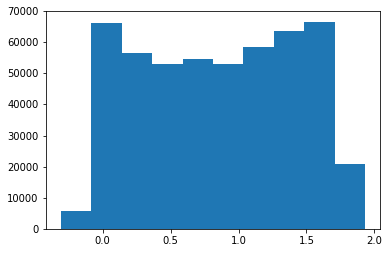

In [86]:
plt.hist(x_fit)

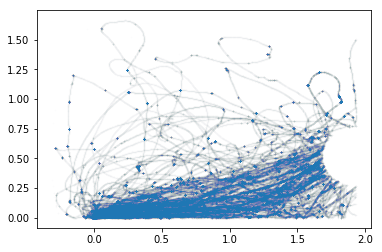

In [88]:
plt.scatter(x_fit, y_fit,s=0.5, alpha=0.009)# s=0.0005, alpha=0.5) #c=speeds   'black'


In [90]:


def fitfunc(x,p,q):
    if x<p:
        return 0
    else:
        return np.abs(x-p)**q



def fitfunc_vec_self(x,p,q):
    y = np.zeros(x.shape)
    for i in range(len(y)):
        y[i]=fitfunc(x[i],p,q)
    return y


fit_params, pcov = curve_fit(fitfunc_vec_self, x_fit, y_fit,p0=[0.04,0.1],maxfev=10000)


In [91]:
print(fit_params)
pcov

[1.02501613 1.23613807]


array([[ 1.01603398e-05, -3.95228881e-05],
       [-3.95228881e-05,  1.61122883e-04]])

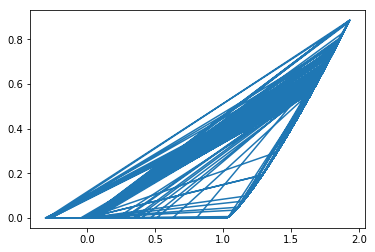

In [102]:

plt.plot(x_fit, fitfunc_vec_self(x_fit, np.array(fit_params)[0],np.array(fit_params)[1]))
# fit params [0] = p.,  [1]=q

# gamma-mixture model

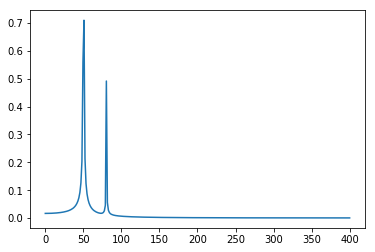

In [110]:
#fourier example
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [286]:
# make list end of trial / end of individual:

l_trial =[0] #gives info of end of trial
l_individual = [0] # gives list of end of each individual
cn =0
for l in range (len(df6)-1): #(0,17000):#
    
    if df6['cntr'][l] != df6['cntr'][l+1]:
        #distinguish between trials 
        if df6['cntr'][l+1] == df6['cntr'][l+2]:
            l_trial.append(l)
            cn += 1
            #everytime cntr == 0: beginning of new locust!
    if ((df6['t'][l] - df6['t'][l+1])**2)**0.5 > 5  :
        l_individual.append(l)
            
            
     
    
    #if l == len(df6-1):
    #    #end of file: append last line
    #    l_trial.append(l)
    #    l_individual.append(l)
    #    cn += 1

l_trial.append(len(df6)-1)
l_individual.append(len(df6)-1)
#for i in len(l_trial):
#    print(l_trial[i])



In [287]:
len(l_trial), len(l_individual)

(156, 50)

In [292]:
df6['cntr'][l_individual[i]-1]

0.0

In [295]:
for i in range(1,49):
    print(  df6['t'][l_individual[i]-1],df6['t'][l_individual[i]] , df6['t'][l_individual[i]+1]) 
    print(  df6['cntr'][l_individual[i]-1],df6['cntr'][l_individual[i]] , df6['cntr'][l_individual[i]+1]) 
 

(2622.54030108, 2622.57394004, 1950.02868795)
(8.0, 8.0, 0.0)
(2057.39644384, 2057.43137884, 2243.81668901)
(0.0, 0.0, 2.0)
(2595.0817039, 2595.1341579, 2031.26543093)
(6.0, 6.0, 6.0)
(2631.86981297, 2631.90474987, 1680.32094002)
(14.0, 14.0, 2.0)
(2656.49722505, 2656.53507209, 1950.03316617)
(7.0, 7.0, 0.0)
(2648.73106313, 2648.76948214, 810.00005794)
(6.0, 6.0, 1.0)
(1205.70734096, 1205.74154806, 1418.63769698)
(3.0, 3.0, 2.0)
(1932.8857100000002, 1932.91808105, 1230.02059197)
(5.0, 5.0, 0.0)
(1935.27515197, 1935.31380296, 2196.96129203)
(6.0, 6.0, 8.0)
(2264.905375, 2264.94094586, 2250.00006509)
(8.0, 8.0, 1.0)
(2636.1368711, 2636.17203498, 810.00008607)
(2.0, 2.0, 1.0)
(1062.10175514, 1062.13783312, 858.79852295)
(1.0, 1.0, 1.0)
(1172.36195612, 1172.39829803, 2250.00008202)
(3.0, 3.0, 1.0)
(2469.9743011, 2470.00717497, 510.01230693)
(2.0, 2.0, 0.0)
(902.6717999, 902.70734787, 1086.31676888)
(4.0, 4.0, 6.0)
(1202.8765049, 1202.91372895, 1302.46172214)
(6.0, 6.0, 2.0)
(1449.49690914,

(0, 16866)
('min', 11.207727734333329)


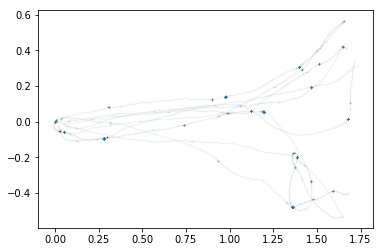

(16866, 19686)
('min', 1.790044848166667)


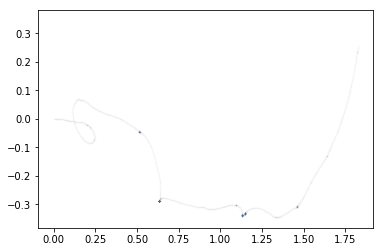

(19686, 28441)
('min', 5.855291148166665)


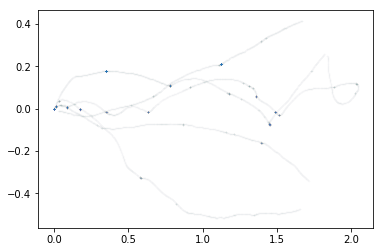

(28441, 43101)
('min', 10.010655315666668)


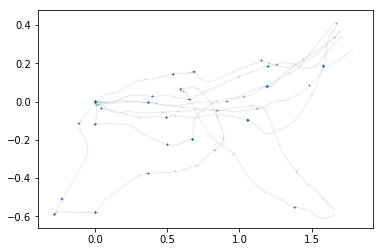

(43101, 67596)
('min', 16.2702355345)


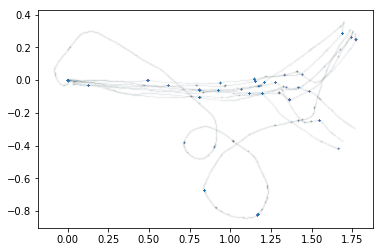

(67596, 85291)
('min', 11.645605266166667)


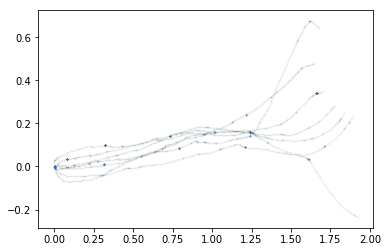

(85291, 95242)
('min', 6.595691501999999)


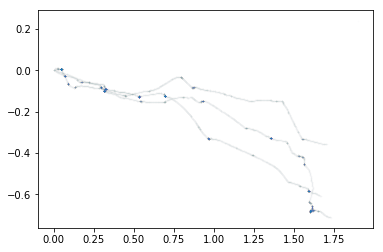

(95242, 108260)
('min', 8.571339734499997)


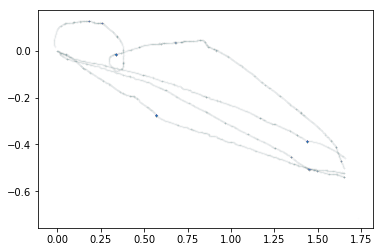

(108260, 126126)
('min', 11.754886849833333)


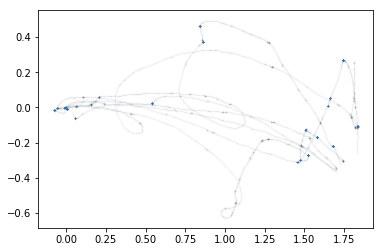

(126126, 127890)
('min', 1.1329942304999956)


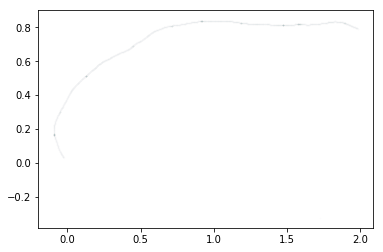

(127890, 137810)
('min', 6.436199498166661)


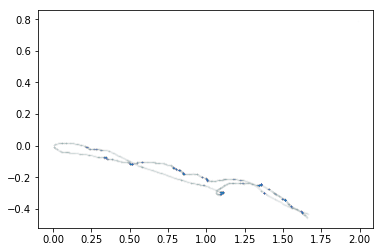

(137810, 144338)
('min', 4.202295784166669)


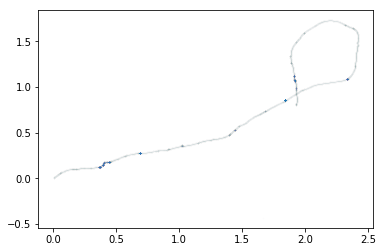

(144338, 152300)
('min', 5.226662918)


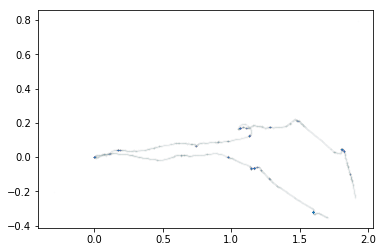

(152300, 157817)
('min', 3.666784882500004)


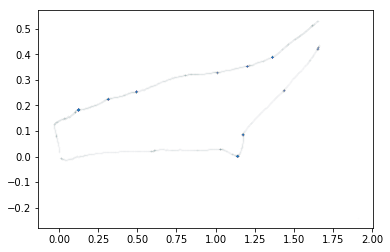

(157817, 167797)
('min', 6.544917349)


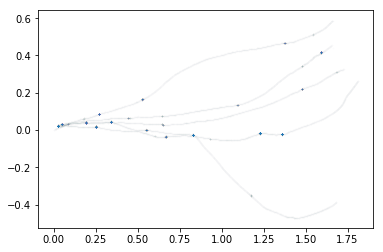

(167797, 170754)
('min', 1.9432826678333337)


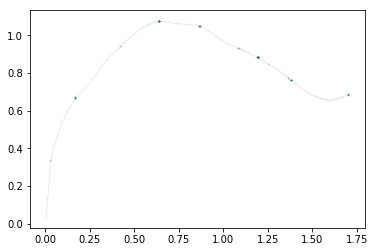

(170754, 174460)
('min', 2.451269880833335)


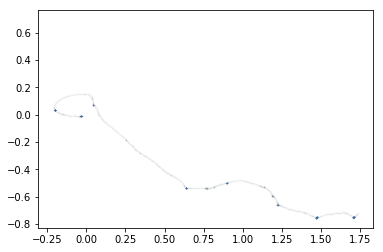

(174460, 187343)
('min', 8.554398616166669)


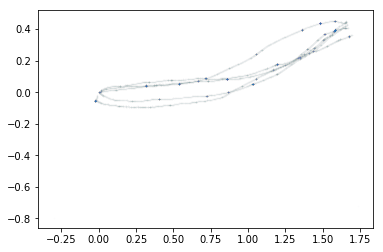

(187343, 191761)
('min', 2.9175457676666685)


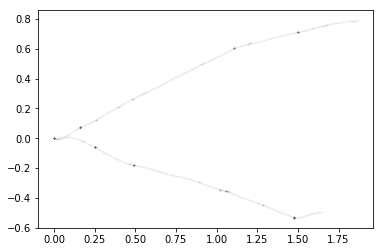

(191761, 203138)
('min', 6.188970418833333)


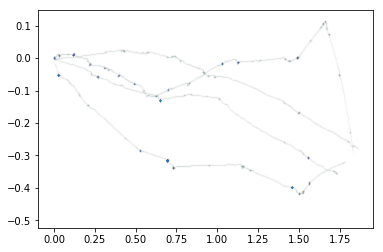

(203138, 203139)
('min', 0.0)


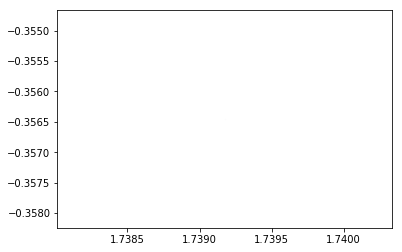

(203139, 210805)
('min', 4.047810785)


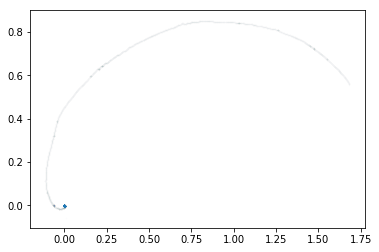

(210805, 214203)
('min', 1.9240578690000008)


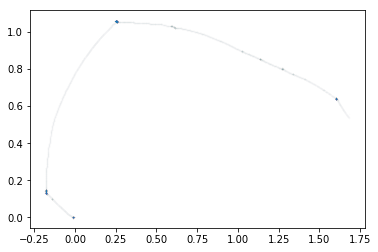

(214203, 221525)
('min', 4.810125915333333)


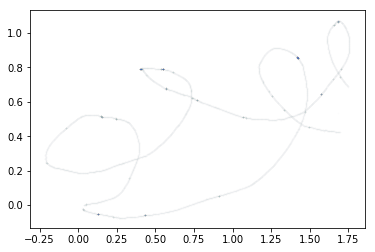

(221525, 233085)
('min', 7.528338615166664)


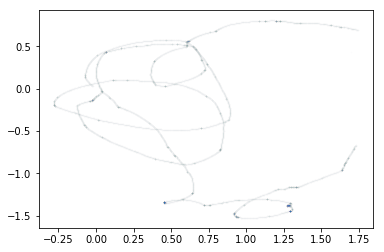

(233085, 238479)
('min', 3.5758919676666676)


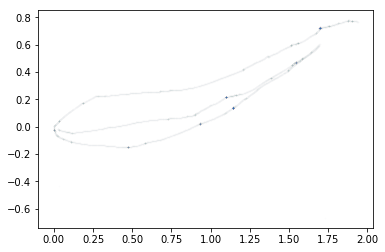

(238479, 255197)
('min', 11.087641382166668)


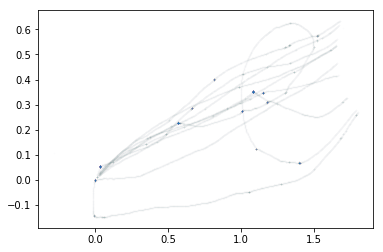

(255197, 259261)
('min', 2.647955381833329)


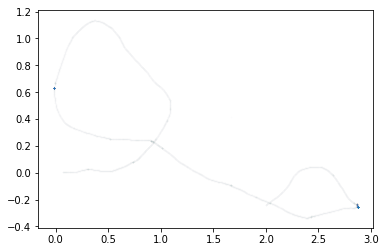

(259261, 274087)
('min', 9.803981832666663)


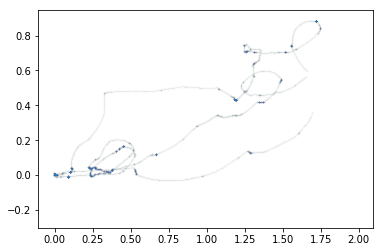

(274087, 285291)
('min', 7.668868148333333)


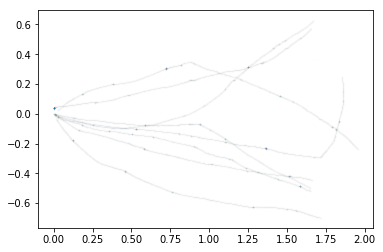

(285291, 286948)
('min', 1.127674150499998)


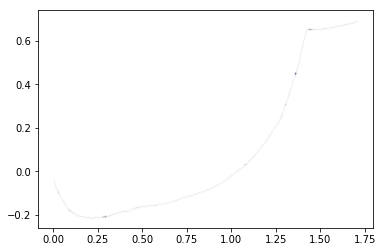

(286948, 289843)
('min', 1.5661958853333318)


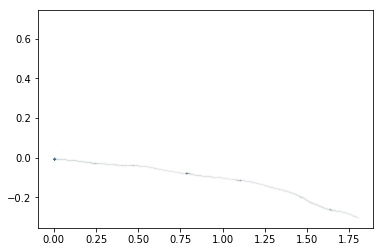

(289843, 296433)
('min', 3.950109751999999)


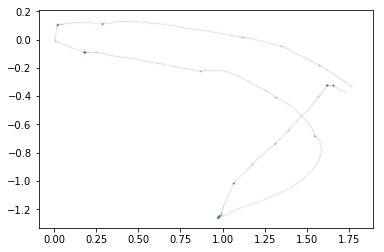

(296433, 298946)
('min', 1.54391795)


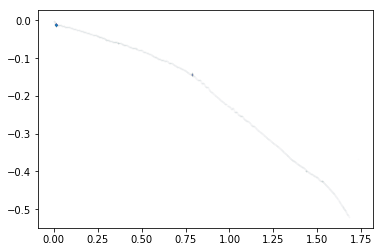

(298946, 306077)
('min', 4.348881499)


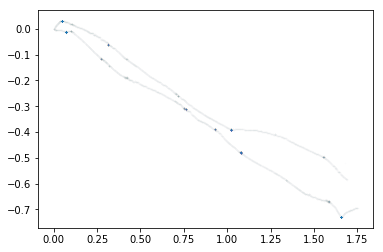

(306077, 311576)
('min', 3.2935539683333332)


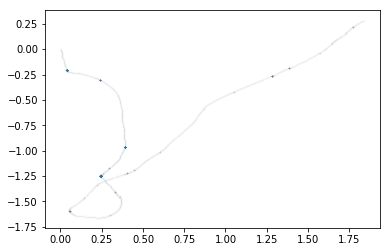

(311576, 315478)
('min', 2.3698285301666675)


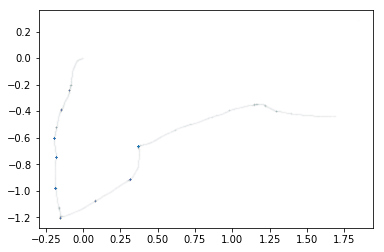

(315478, 325641)
('min', 6.281179114333333)


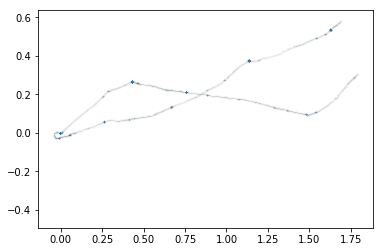

(325641, 342584)
('min', 10.405667603)


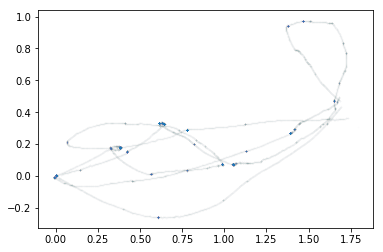

(342584, 355977)
('min', 2.2514201163333327)


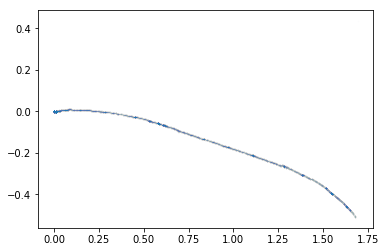

(355977, 412949)
('min', 9.652694865)


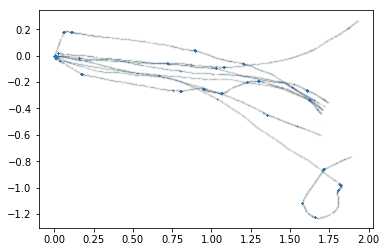

(412949, 439880)
('min', 4.798323031166668)


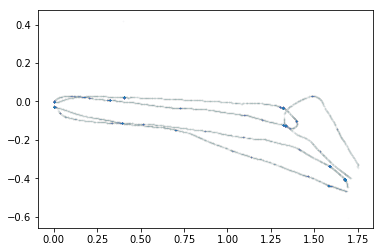

(439880, 458845)
('min', 10.906629149)


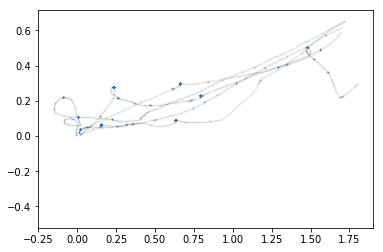

(458845, 464327)
('min', 3.2025790651666663)


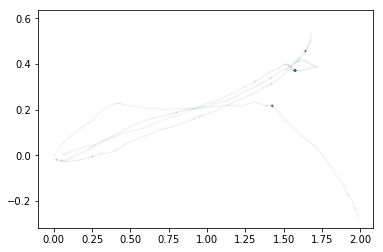

(464327, 471208)
('min', 3.9228808998333347)


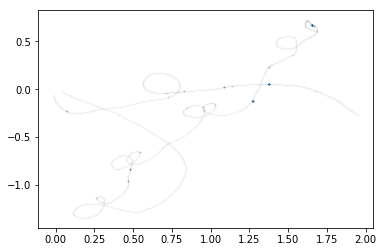

(471208, 472853)
('min', 0.9730522313333334)


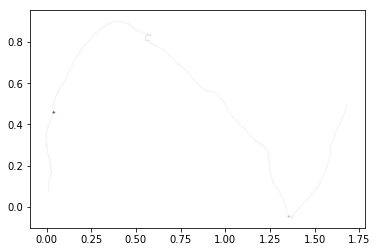

(472853, 484010)
('min', 6.350915515333335)


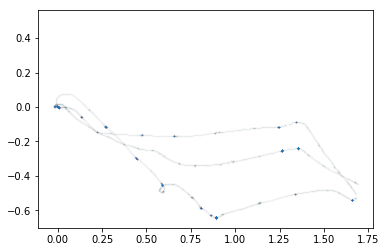

(484010, 497488)
('min', 7.148312584500002)


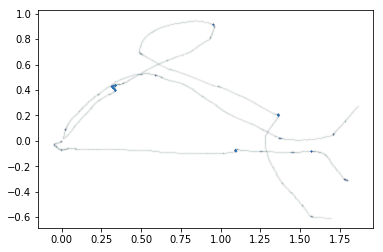

(497488, 499245)
('min', 0.9527161518333362)


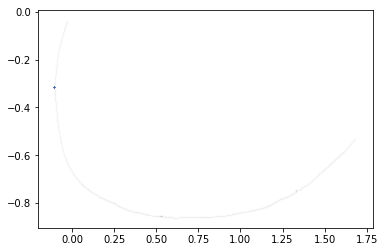

(499245, 502557)
('min', 1.696388868500001)


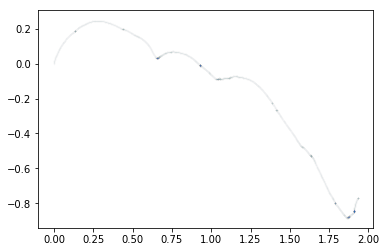

"# TRIALS\nfor i in range (len(l_trial)-1):\n    plt.scatter(np.array(df6)[l_trial[i]:l_trial[i+1],9], np.array(df6)[l_trial[i]:l_trial[i+1],10],s=0.5, alpha=0.009)# s=0.0005, alpha=0.5) #c=speeds   'black'\n    print(l_trial[i],l_trial[i+1] )\n    plt.show()"

In [278]:

#INDIVIDUALS
for i in range (len(l_individual)-1):
    plt.scatter(np.array(df6)[l_individual[i]:l_individual[i+1],9], np.array(df6)[l_individual[i]:l_individual[i+1],10],s=0.5, alpha=0.009)# s=0.0005, alpha=0.5) #c=speeds   'black'
    print(l_individual[i],l_individual[i+1] )
    print('min',(df6['t'][l_individual[i+1]] - df6['t'][l_individual[i]+1])/60)
    # why +1?: df6['t'][l_individual[i]+1]) --> lines in l_individual are end of df, line+1
    plt.show()
  

(0, 1911)


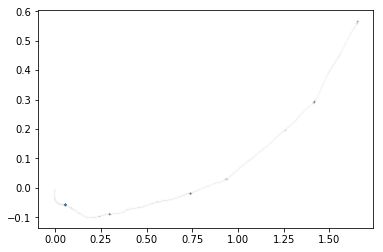

(1911, 3420)


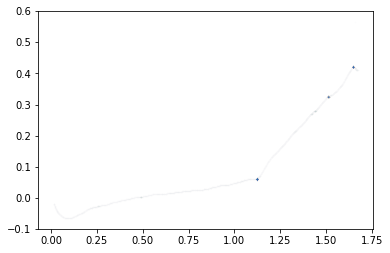

(3420, 4643)


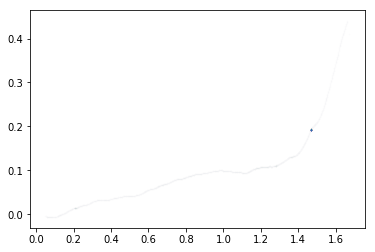

(4643, 7035)


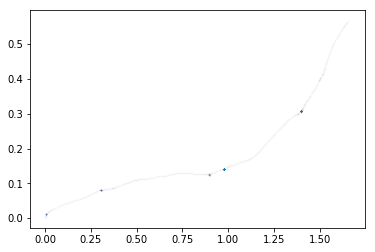

(7035, 10294)


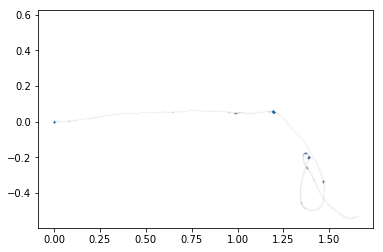

(10294, 12296)


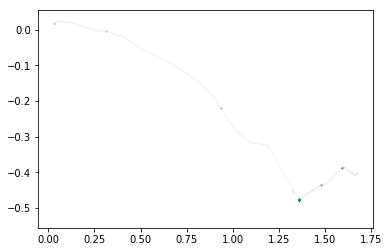

(12296, 13383)


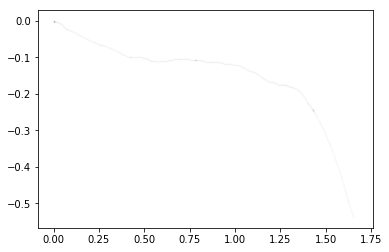

(13383, 15285)


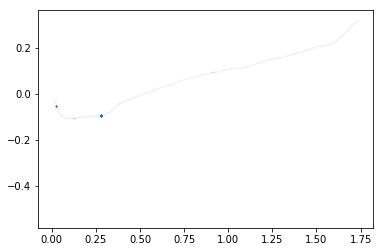

(15285, 16866)


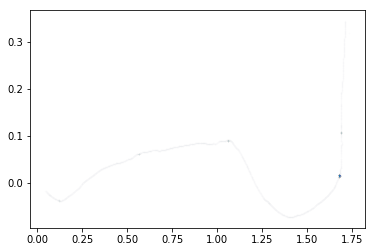

(16866, 19686)


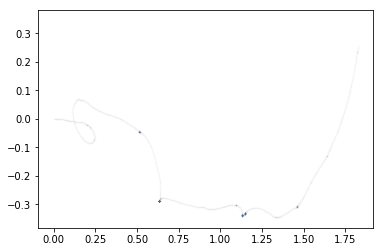

(19686, 22010)


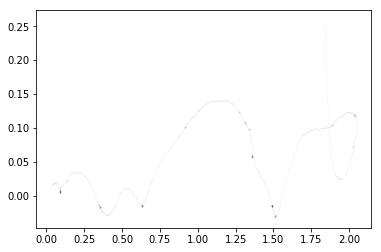

(22010, 23361)


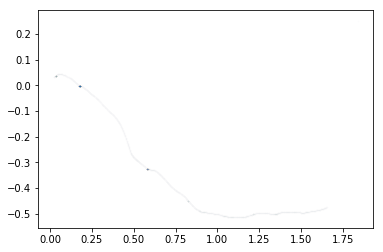

(23361, 24750)


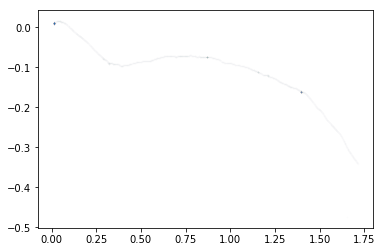

(24750, 26273)


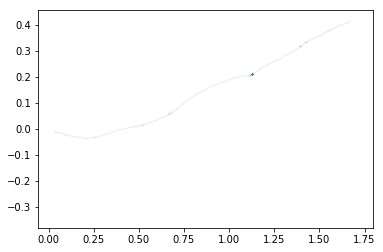

(26273, 28442)


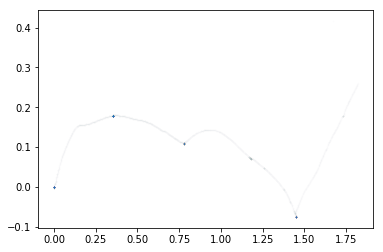

(28442, 31715)


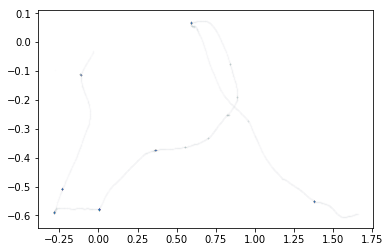

(31715, 33361)


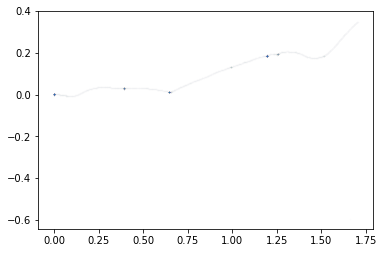

(33361, 35474)


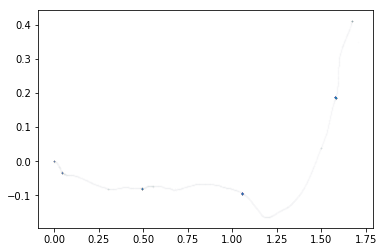

(35474, 36868)


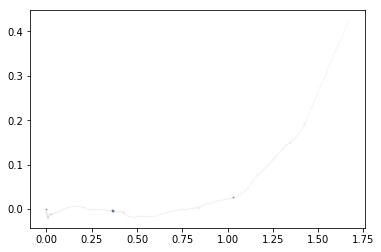

(36868, 38271)


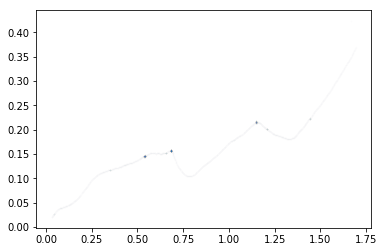

(38271, 39668)


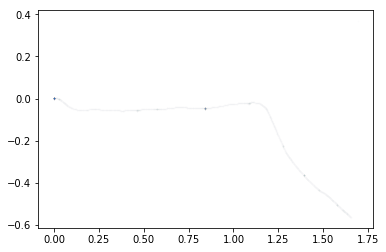

(39668, 41923)


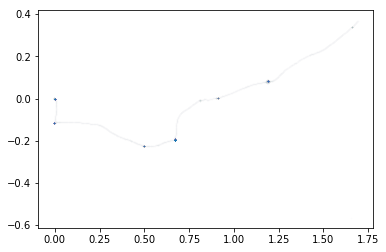

(41923, 43101)


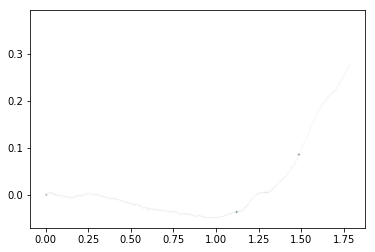

(43101, 49858)


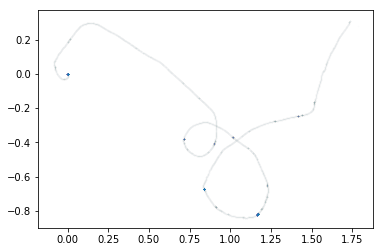

(49858, 52324)


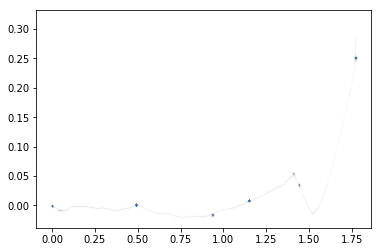

(52324, 54370)


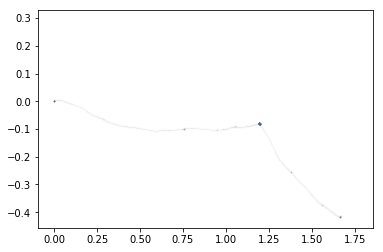

(54370, 56669)


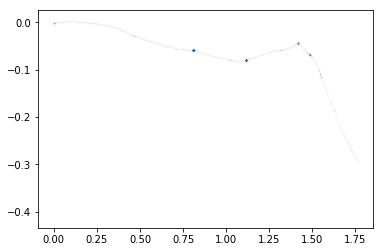

(56669, 58583)


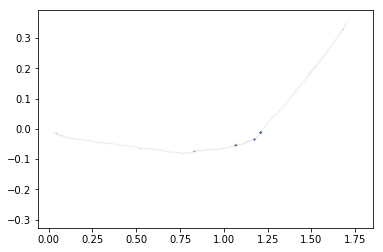

(58583, 60504)


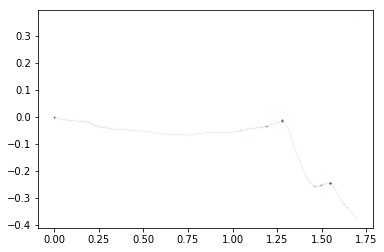

(60504, 62872)


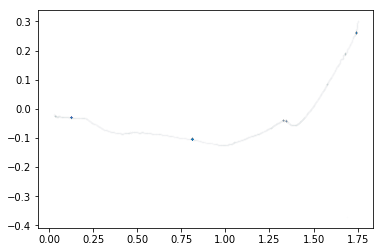

(62872, 65201)


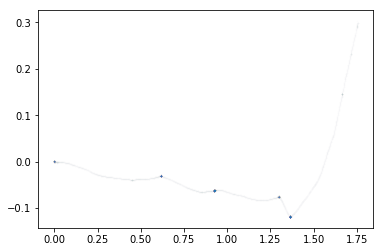

(65201, 67596)


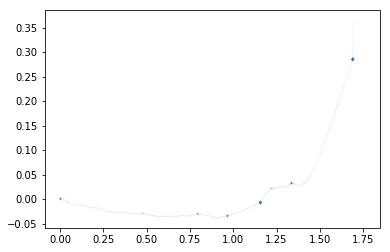

(67596, 69977)


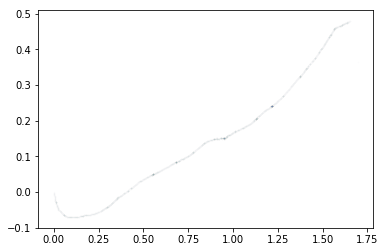

(69977, 72944)


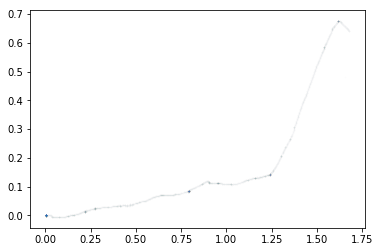

(72944, 75479)


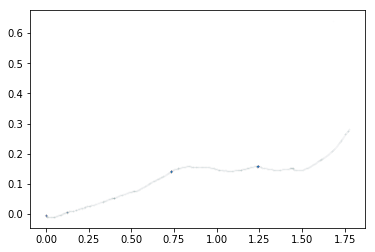

(75479, 77967)


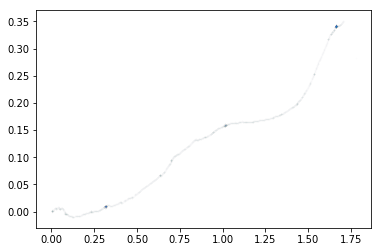

(77967, 80446)


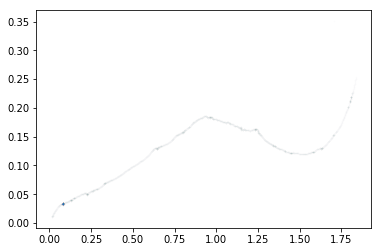

(80446, 83091)


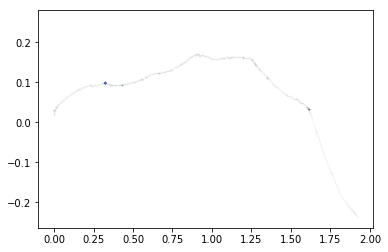

(83091, 85291)


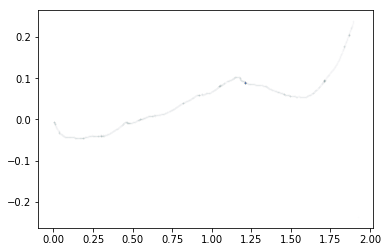

(85291, 88789)


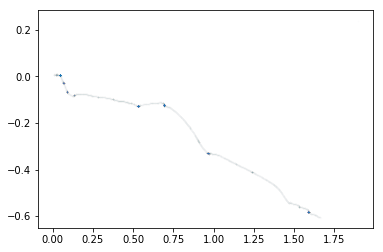

(88789, 91494)


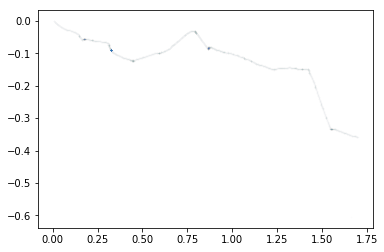

(91494, 95242)


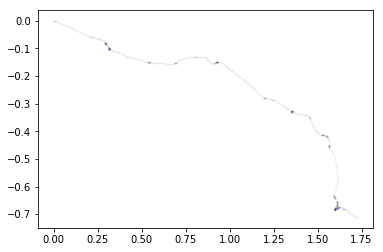

(95242, 99870)


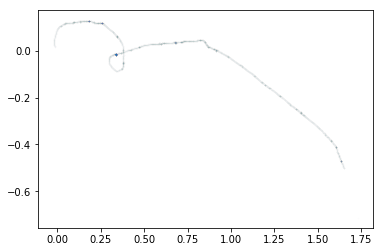

(99870, 102995)


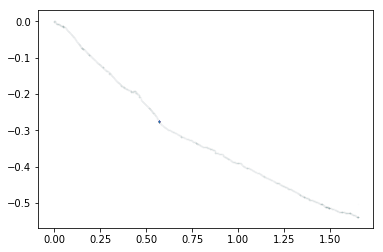

(102995, 105667)


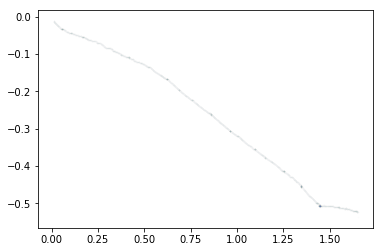

(105667, 108260)


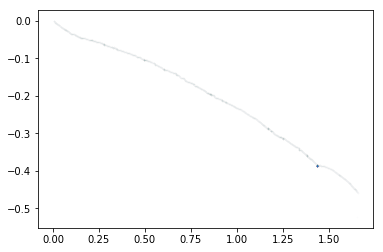

(108260, 110758)


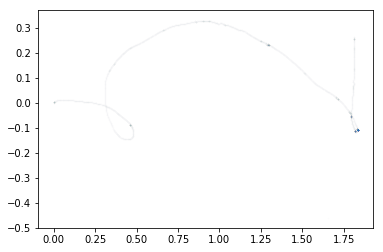

(110758, 112018)


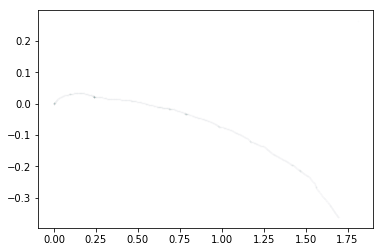

(112018, 113599)


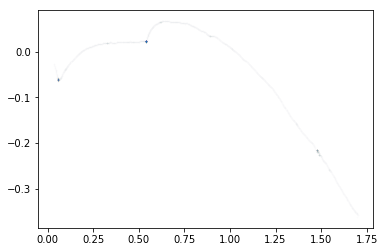

(113599, 117325)


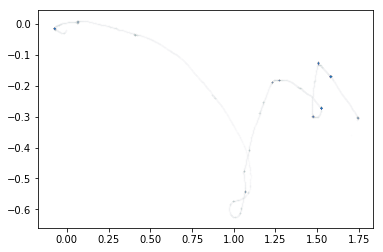

(117325, 120500)


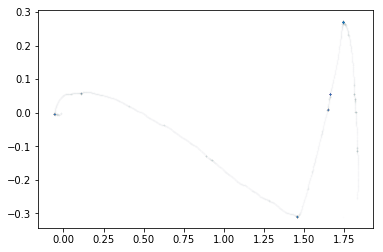

(120500, 122218)


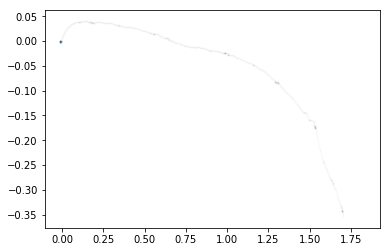

(122218, 126126)


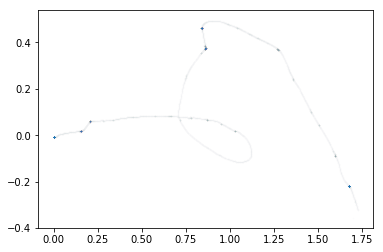

(126126, 127890)


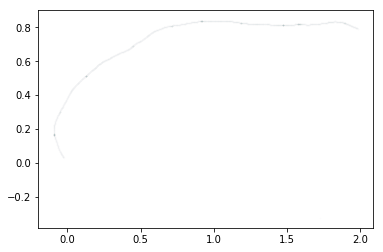

(127890, 133130)


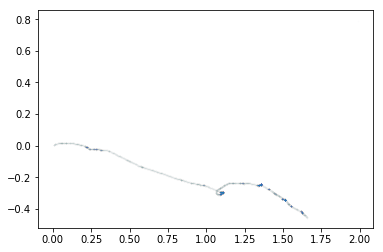

(133130, 137810)


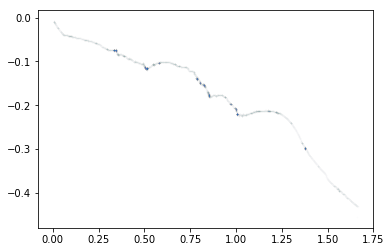

(137810, 144339)


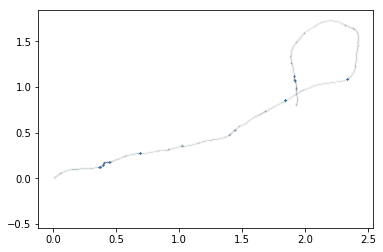

(144339, 147866)


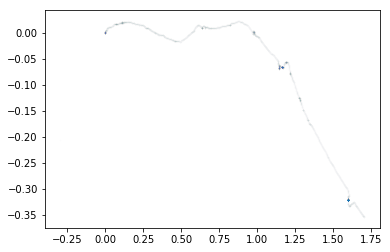

(147866, 152300)


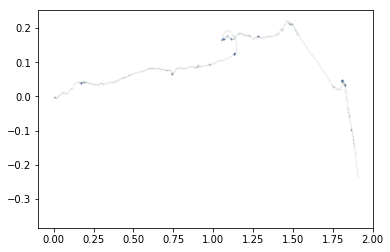

(152300, 155658)


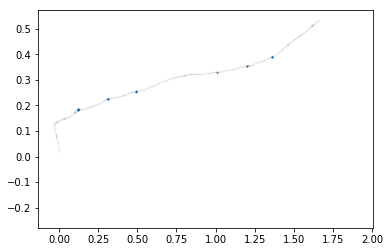

(155658, 157817)


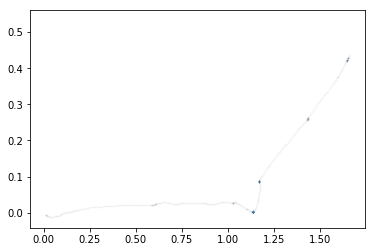

(157817, 160821)


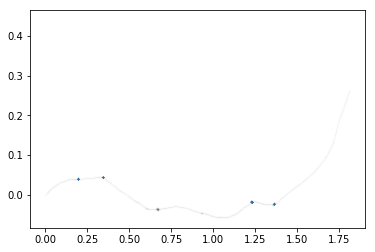

(160821, 163267)


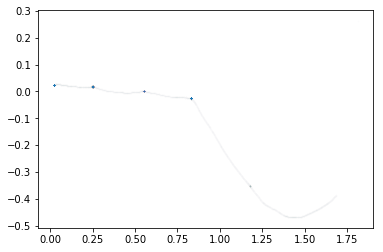

(163267, 164631)


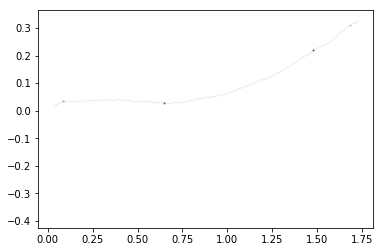

(164631, 166149)


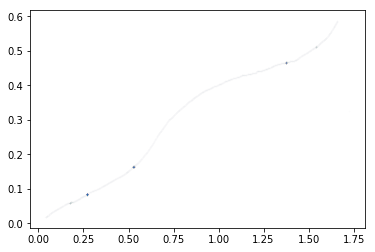

(166149, 167797)


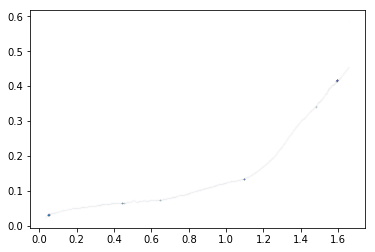

(167797, 170754)


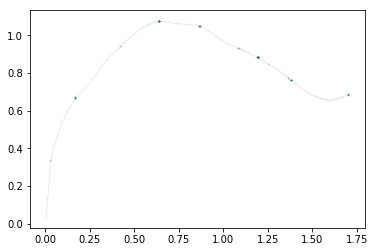

(170754, 174461)


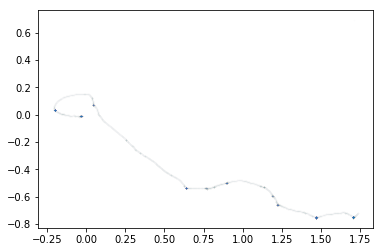

(174461, 177125)


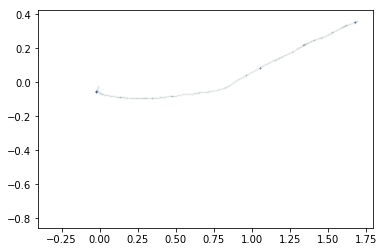

(177125, 179839)


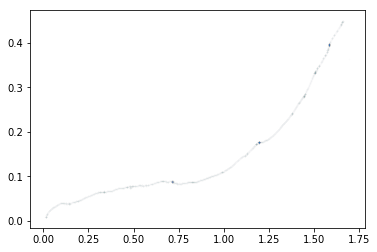

(179839, 182392)


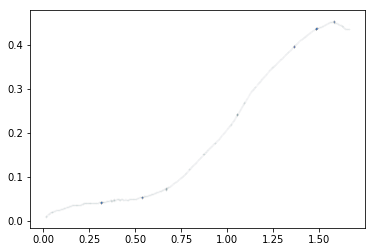

(182392, 184835)


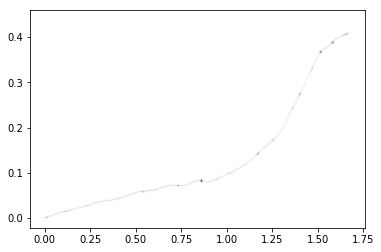

(184835, 187343)


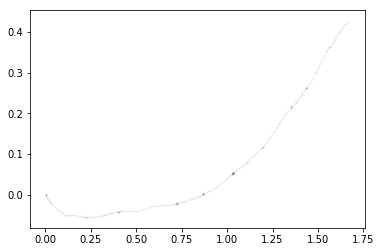

(187343, 189540)


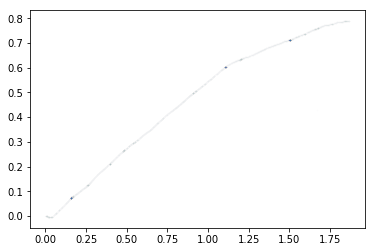

(189540, 191761)


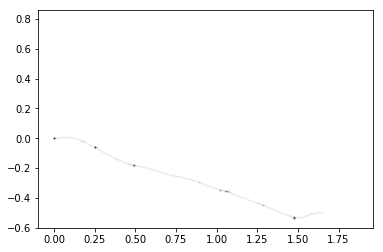

(191761, 195573)


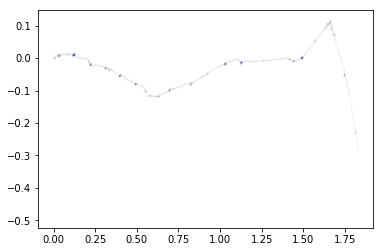

(195573, 198730)


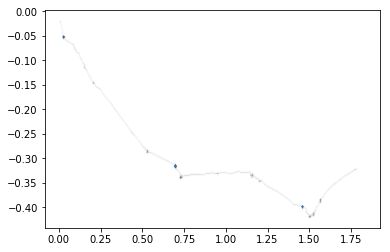

(198730, 200896)


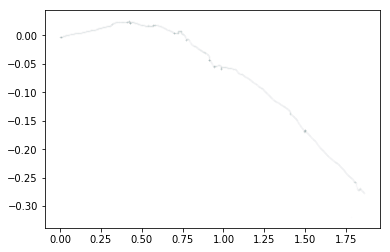

(200896, 203138)


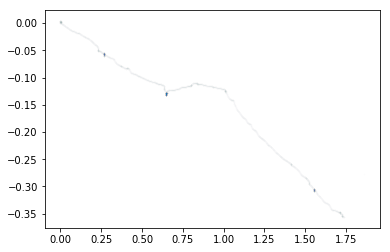

(203138, 210804)


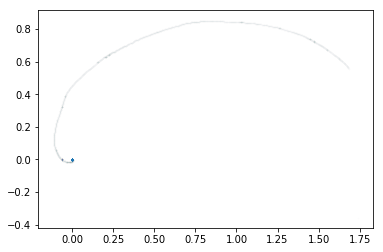

(210804, 214202)


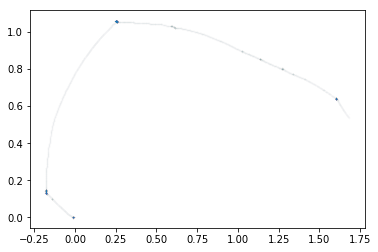

(214202, 218907)


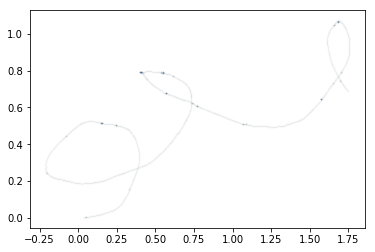

(218907, 221524)


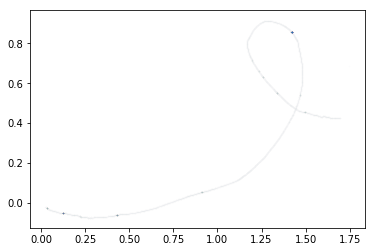

(221524, 229211)


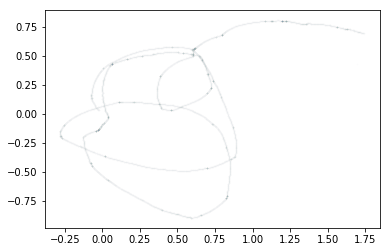

(229211, 233084)


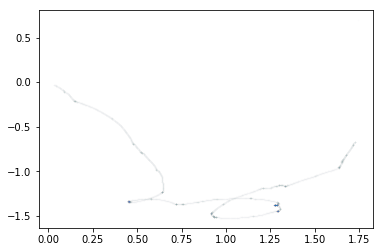

(233084, 234940)


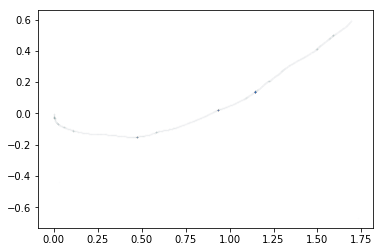

(234940, 236865)


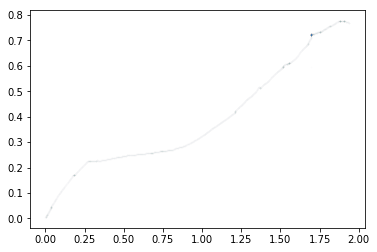

(236865, 238479)


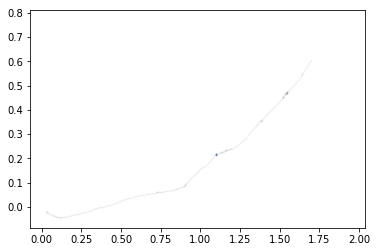

(238479, 240381)


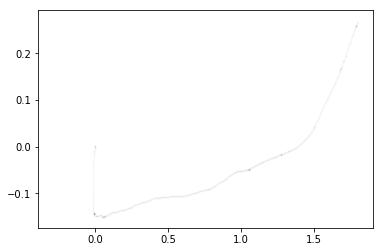

(240381, 242151)


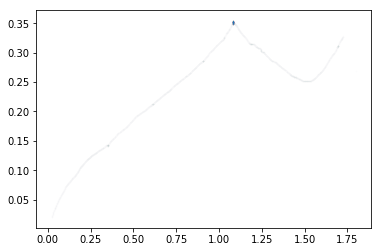

(242151, 243488)


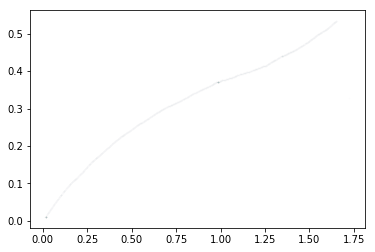

(243488, 244881)


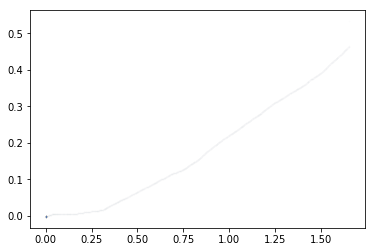

(244881, 246279)


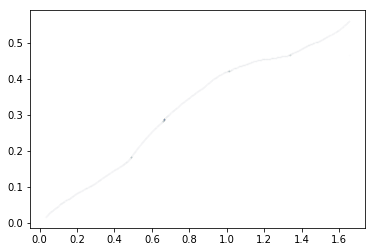

(246279, 247615)


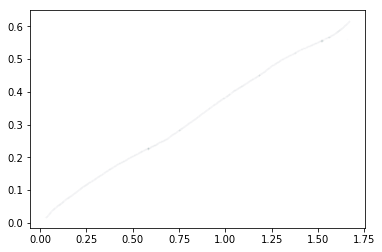

(247615, 249159)


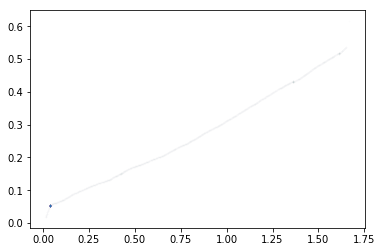

(249159, 250683)


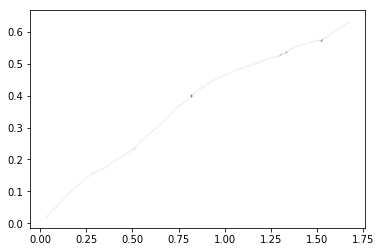

(250683, 253827)


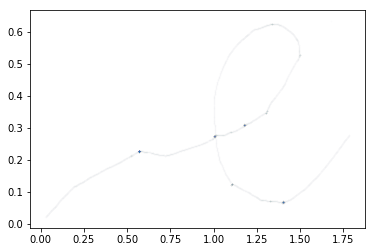

(253827, 255196)


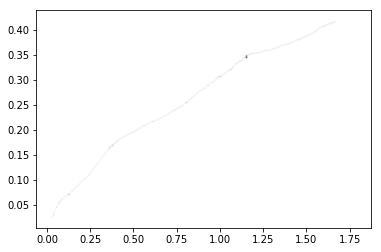

(255196, 264785)


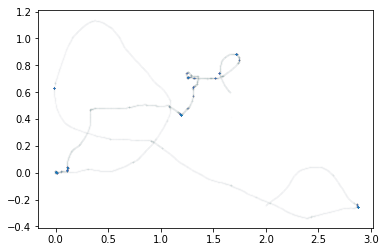

(264785, 272055)


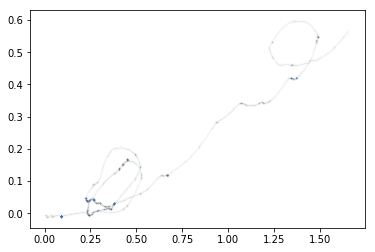

(272055, 274086)


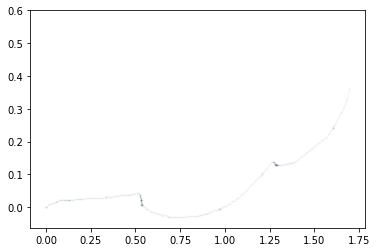

(274086, 275484)


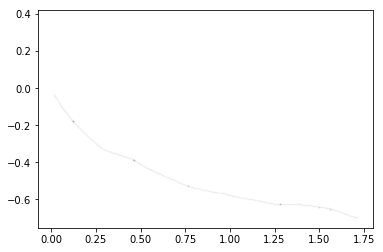

(275484, 276778)


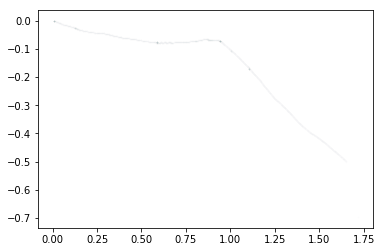

(276778, 278062)


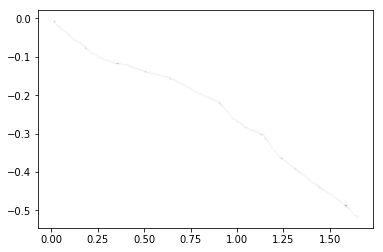

(278062, 279294)


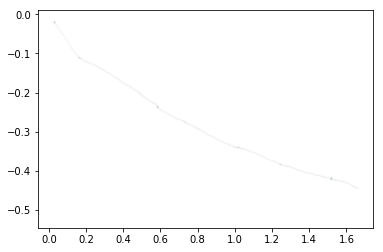

(279294, 281029)


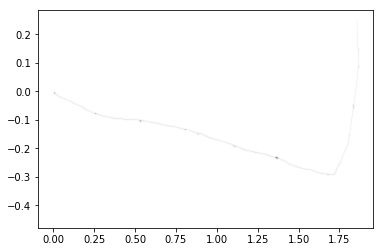

(281029, 282390)


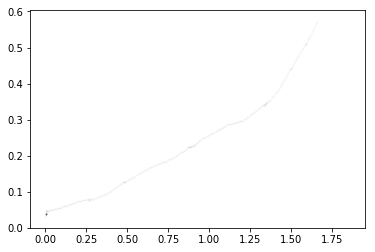

(282390, 283994)


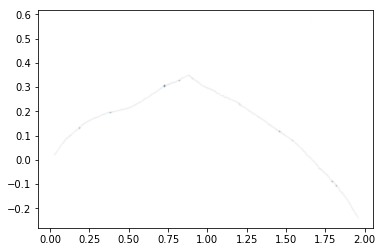

(283994, 285290)


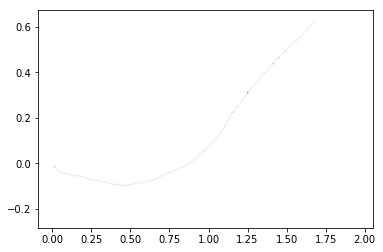

(285290, 286947)


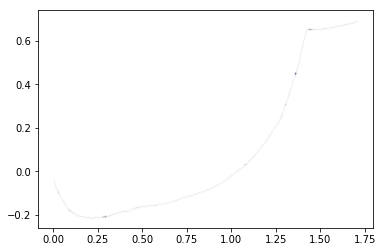

(286947, 289842)


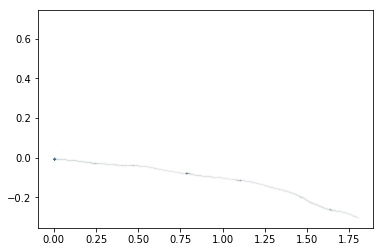

(289842, 291908)


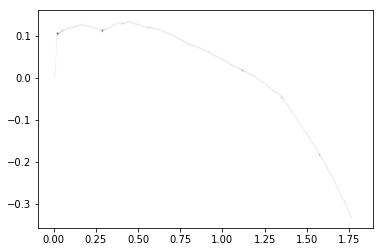

(291908, 298945)


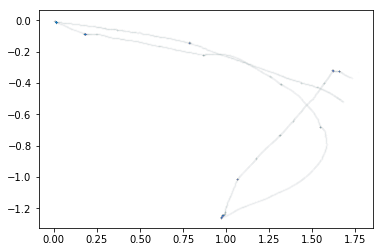

(298945, 302692)


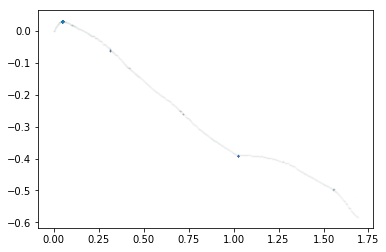

(302692, 306076)


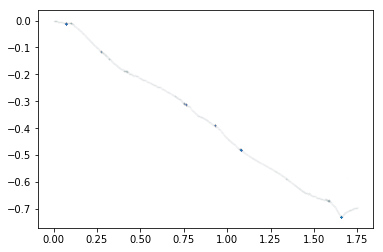

(306076, 311575)


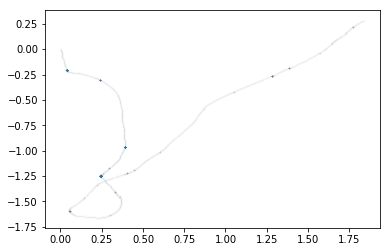

(311575, 315477)


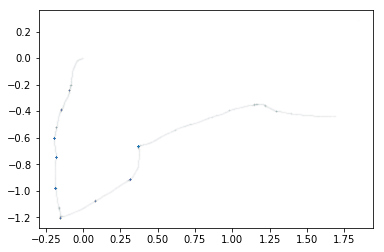

(315477, 321058)


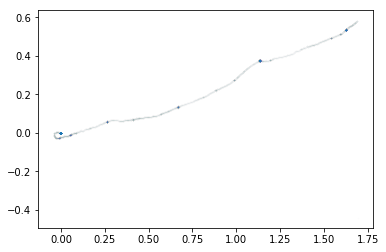

(321058, 328279)


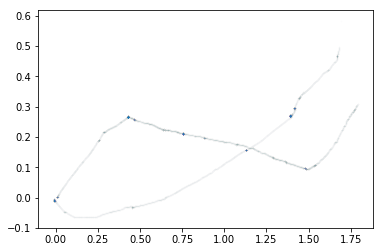

(328279, 334170)


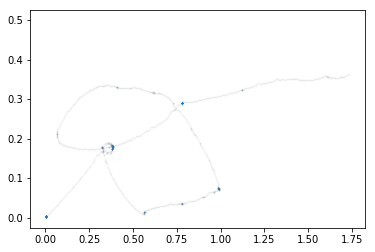

(334170, 340562)


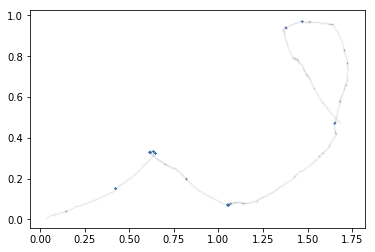

(340562, 342583)


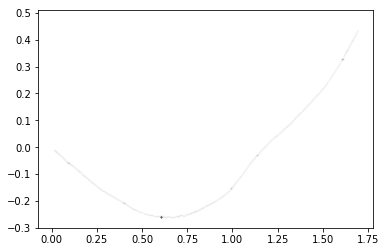

(342583, 355976)


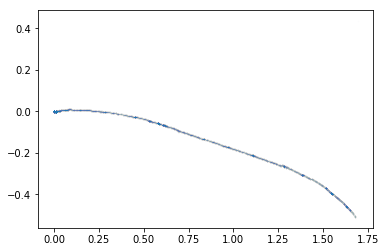

(355976, 364214)


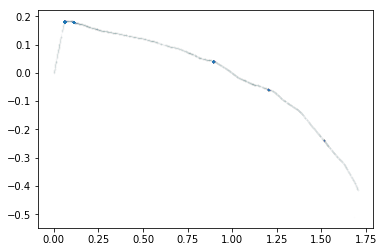

(364214, 376820)


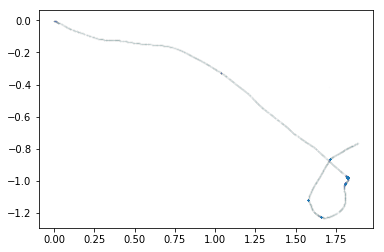

(376820, 381180)


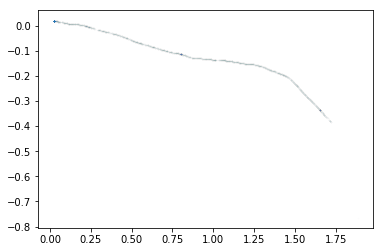

(381180, 385218)


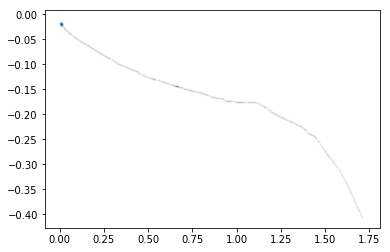

(385218, 394583)


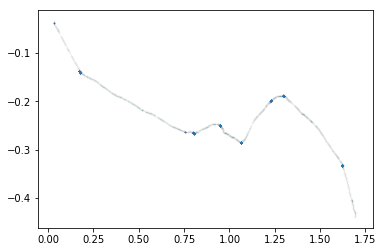

(394583, 401474)


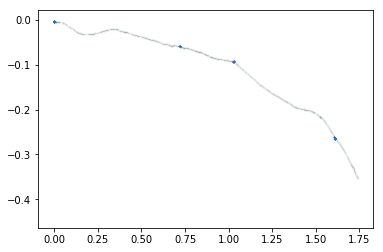

(401474, 407431)


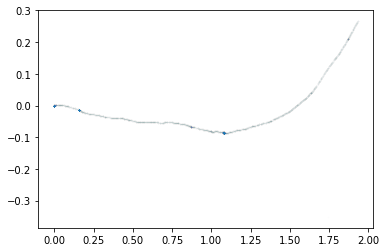

(407431, 412948)


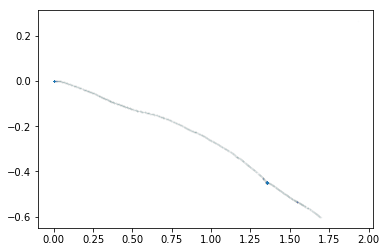

(412948, 419397)


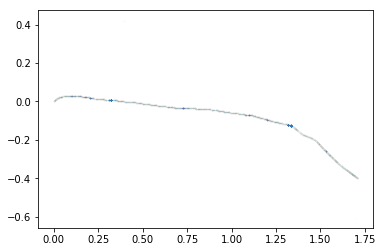

(419397, 427247)


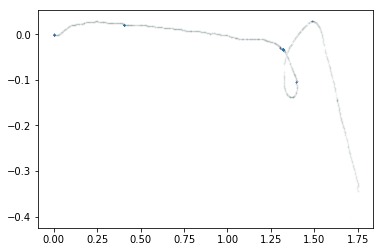

(427247, 433614)


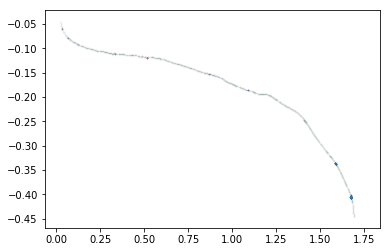

(433614, 439879)


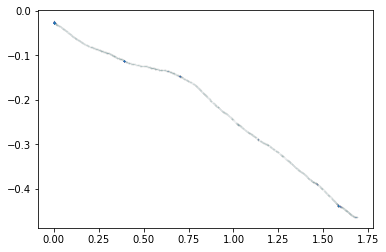

(439879, 444331)


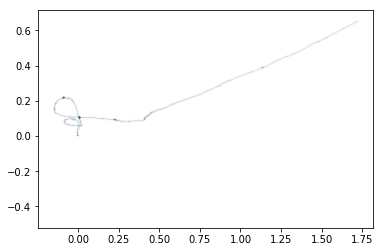

(444331, 449363)


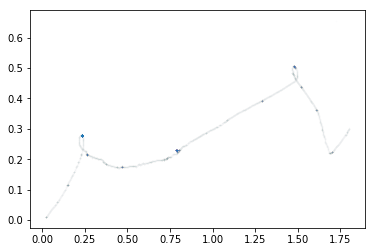

(449363, 452589)


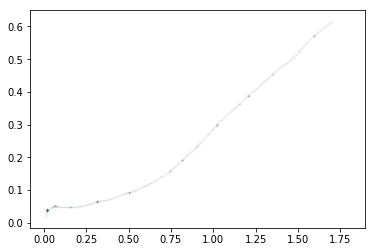

(452589, 456025)


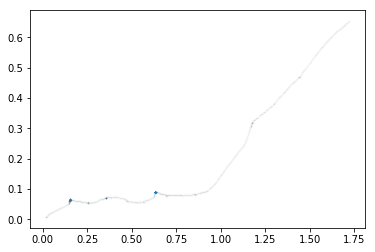

(456025, 458844)


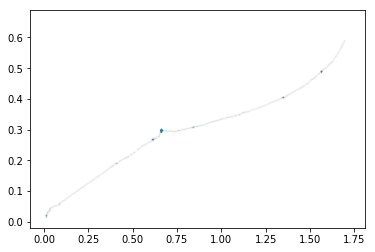

(458844, 460234)


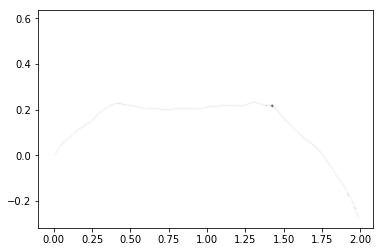

(460234, 461444)


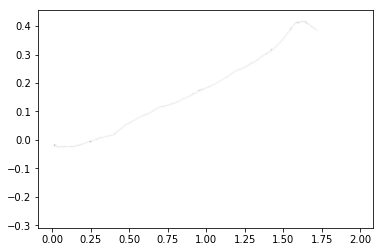

(461444, 462988)


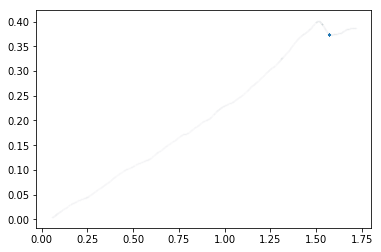

(462988, 464326)


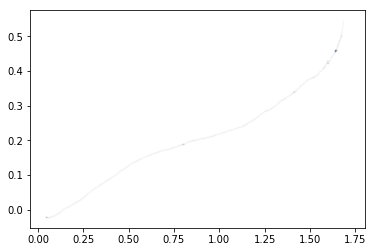

(464326, 466438)


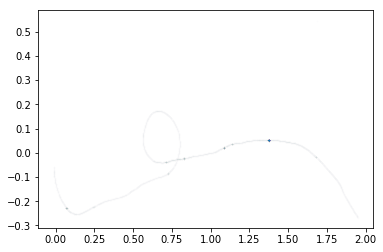

(466438, 471207)


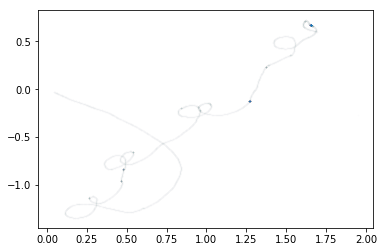

(471207, 472852)


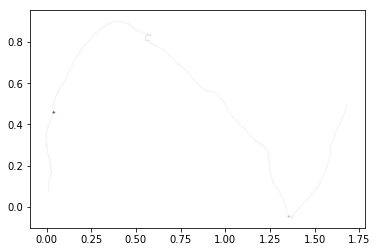

(472852, 476906)


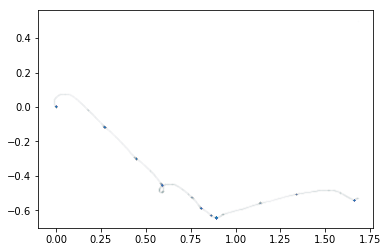

(476906, 481264)


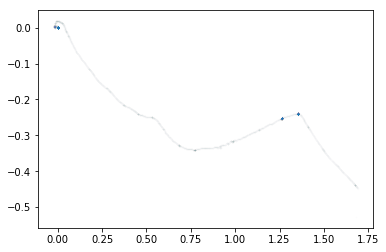

(481264, 484009)


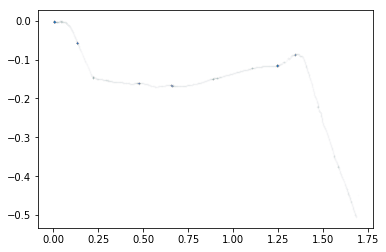

(484009, 487616)


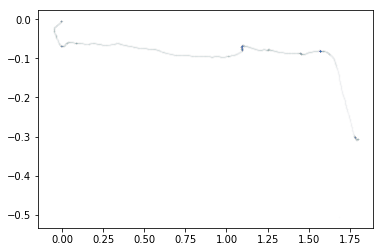

(487616, 490989)


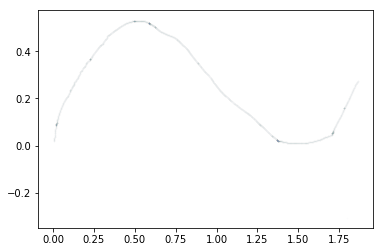

(490989, 497487)


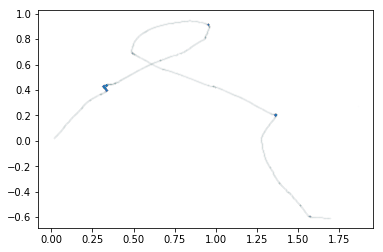

(497487, 499244)


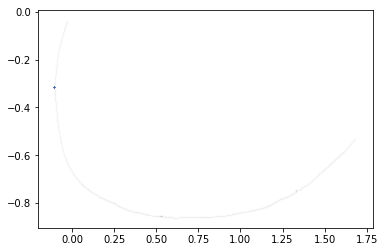

(499244, 502556)


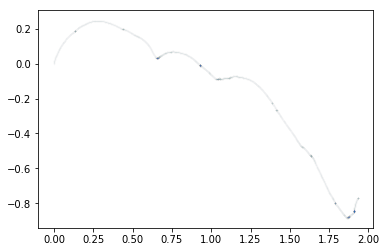

In [301]:
# TRIALS
for i in range (len(l_trial)-1):
    plt.scatter(np.array(df6)[l_trial[i]:l_trial[i+1],9], np.array(df6)[l_trial[i]:l_trial[i+1],10],s=0.5, alpha=0.009)# s=0.0005, alpha=0.5) #c=speeds   'black'
    print(l_trial[i],l_trial[i+1] )
    #print('min',(df6['t'][l_individual[i+1]] - df6['t'][l_individual[i]+1])/60)
    plt.show()

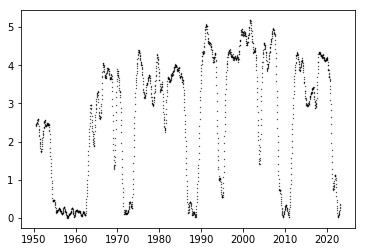

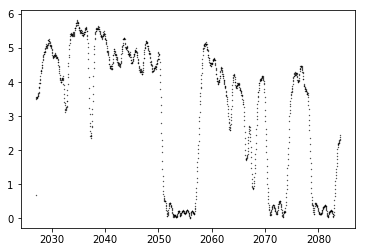

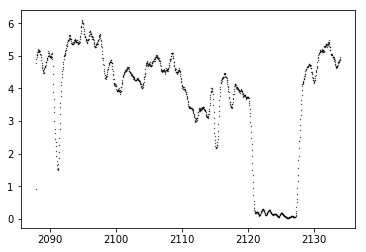

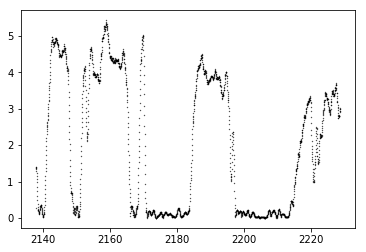

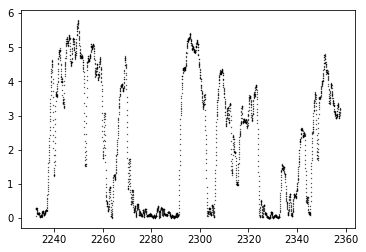

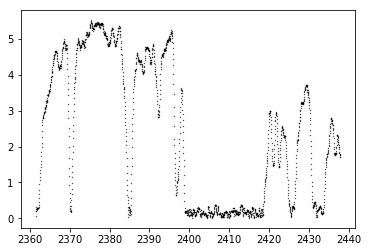

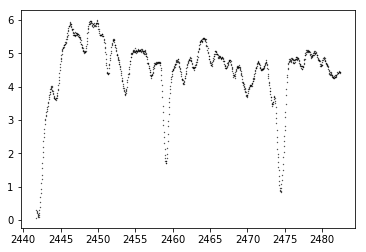

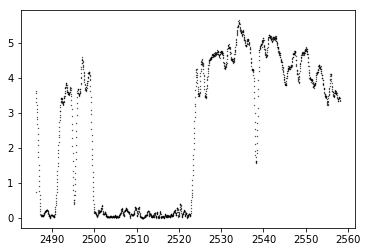

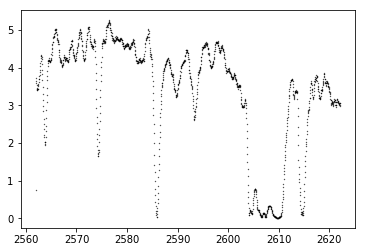

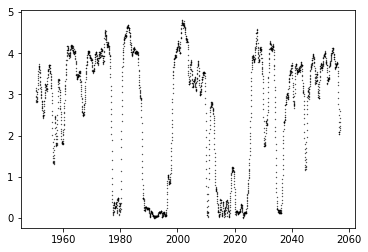

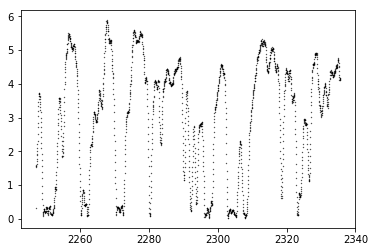

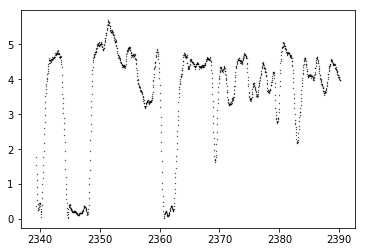

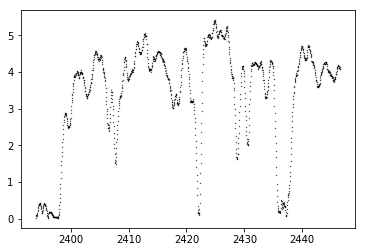

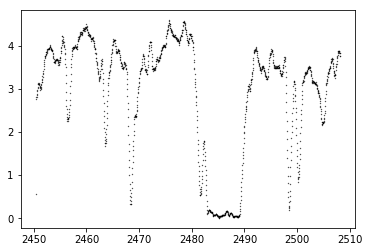

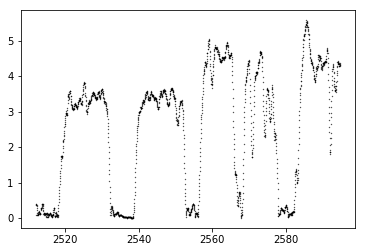

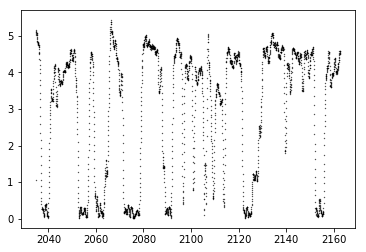

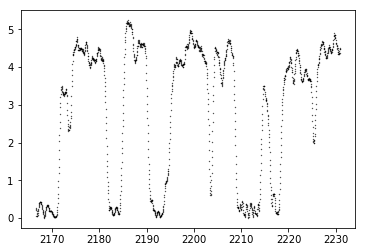

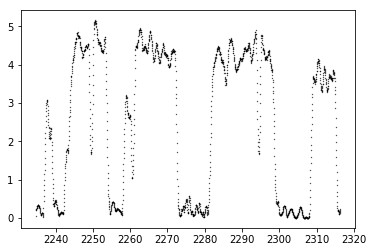

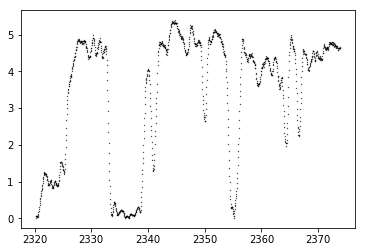

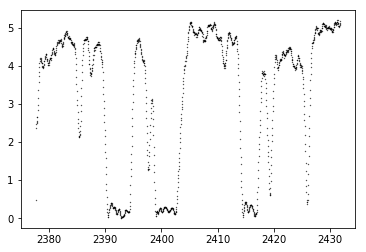

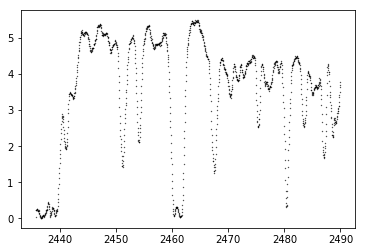

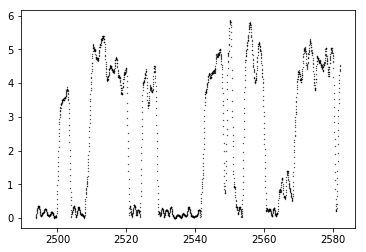

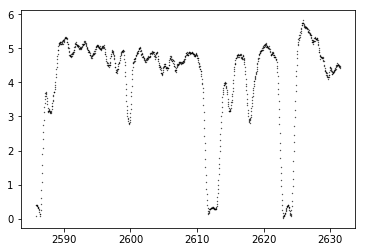

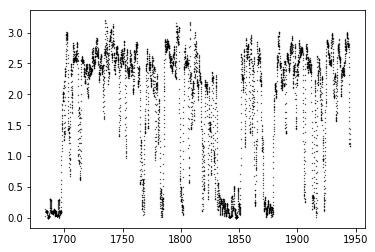

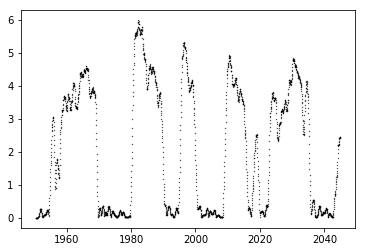

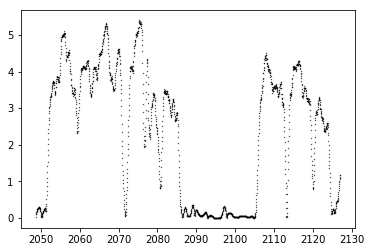

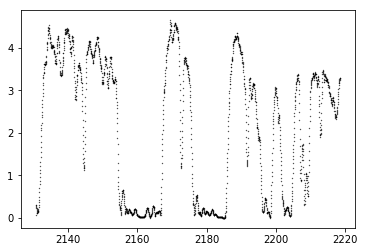

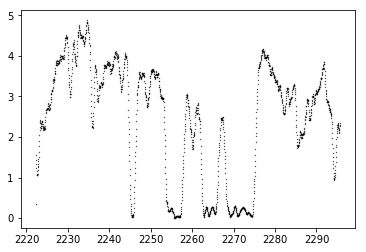

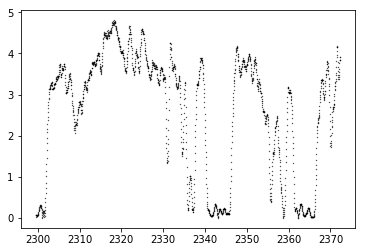

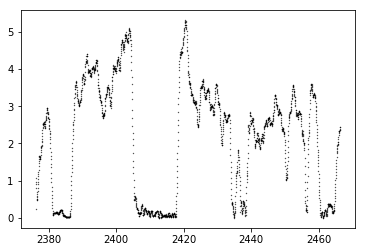

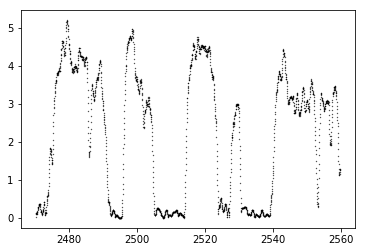

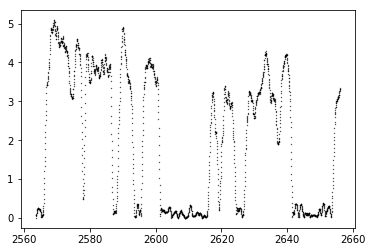

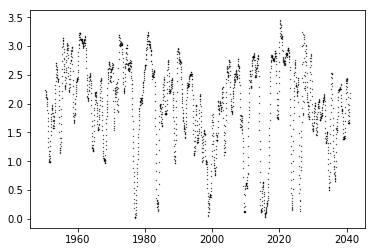

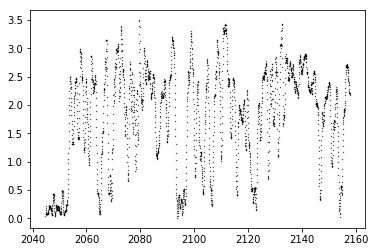

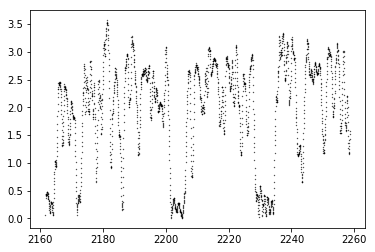

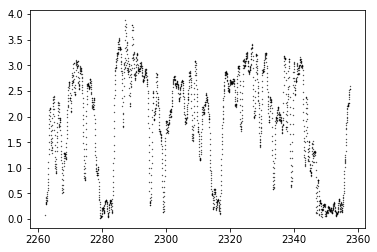

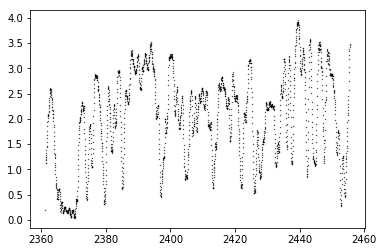

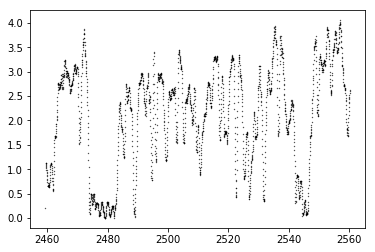

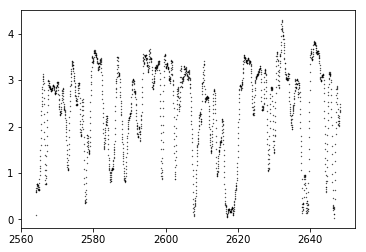

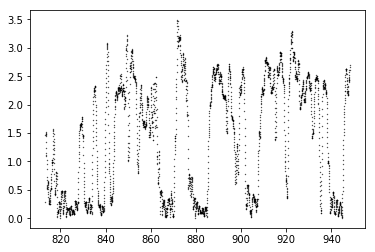

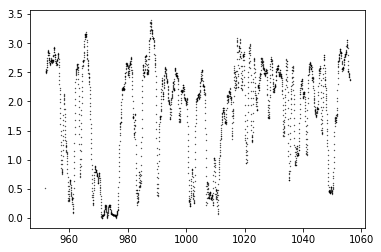

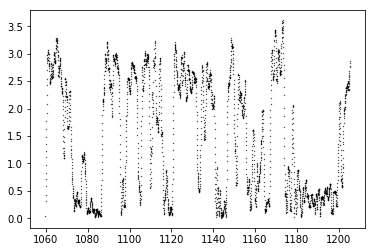

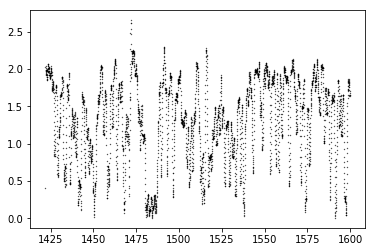

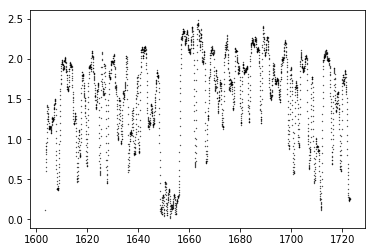

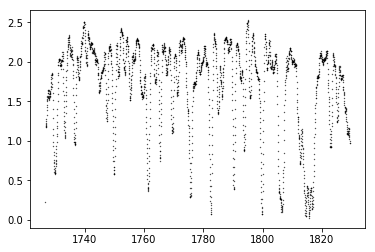

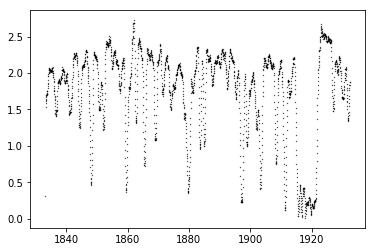

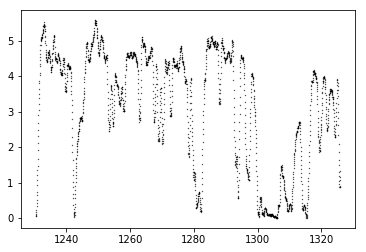

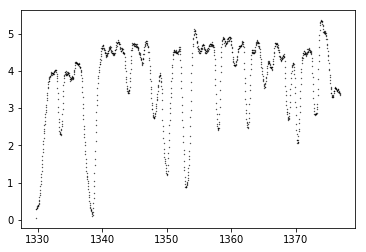

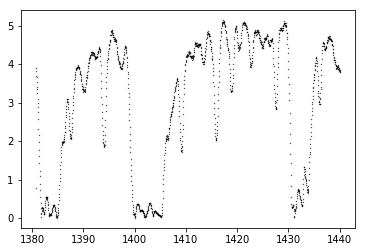

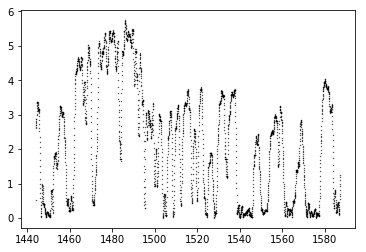

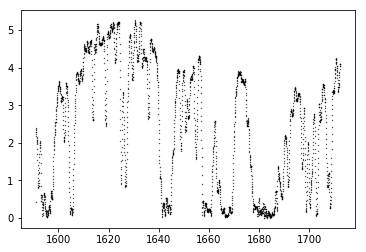

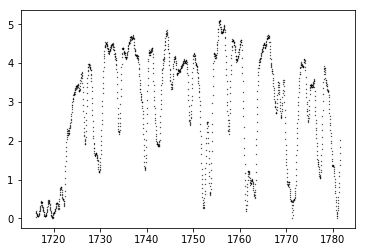

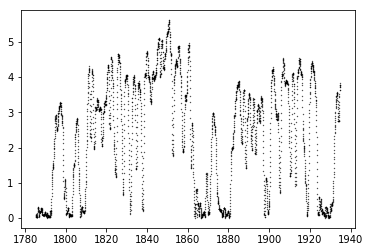

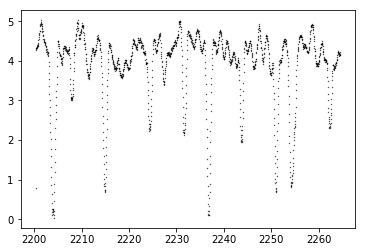

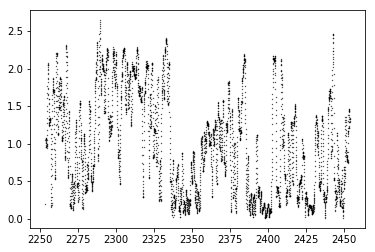

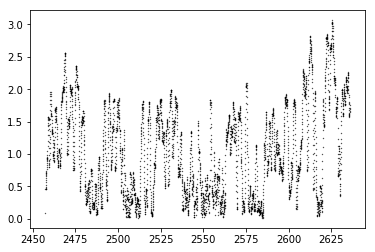

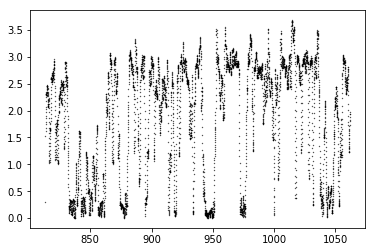

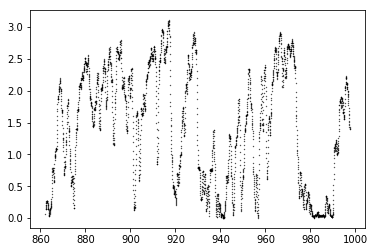

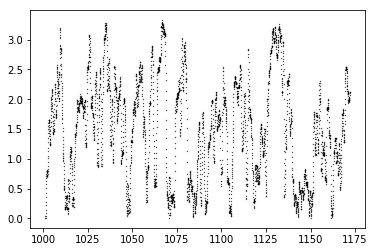

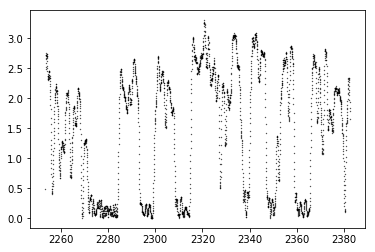

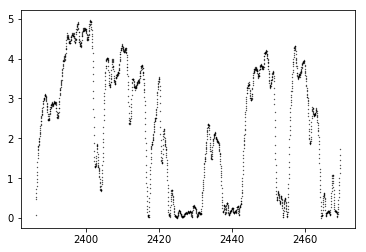

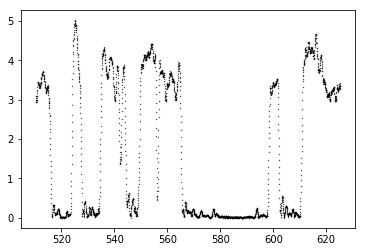

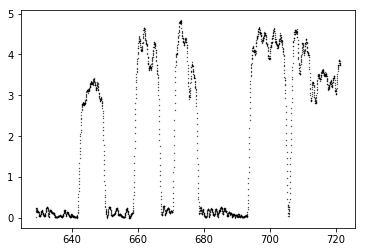

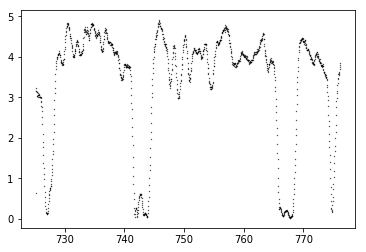

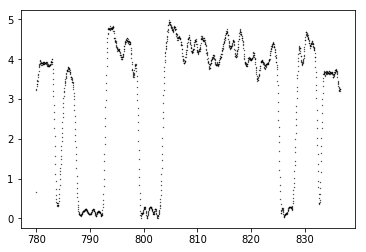

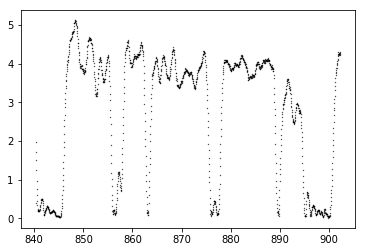

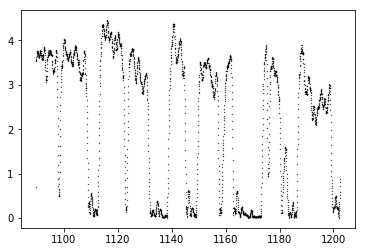

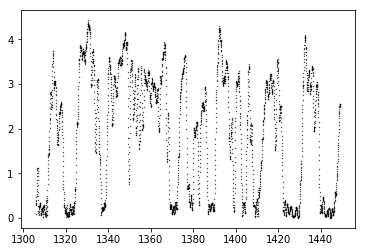

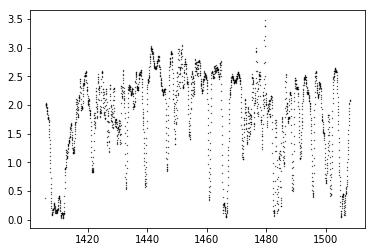

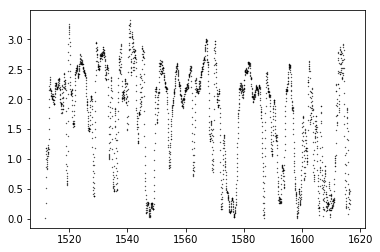

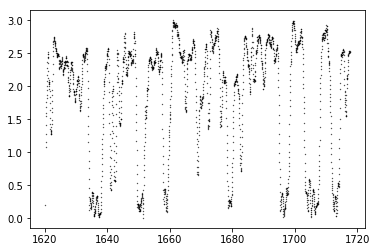

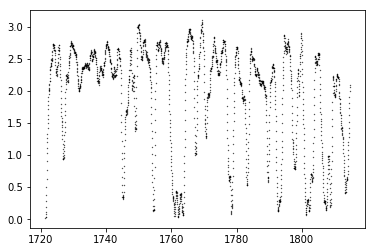

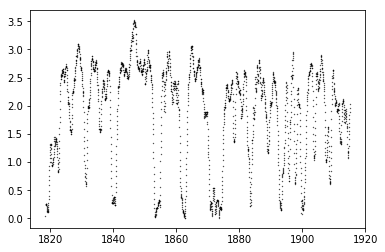

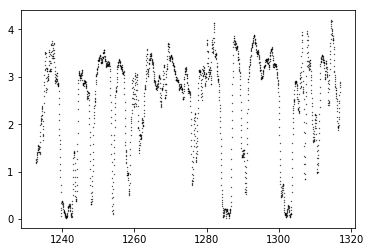

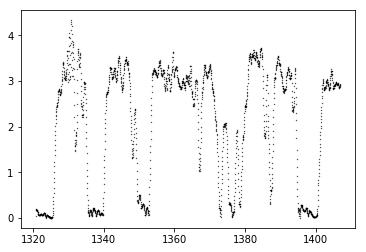

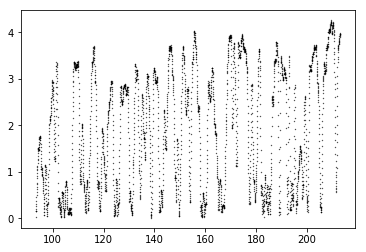

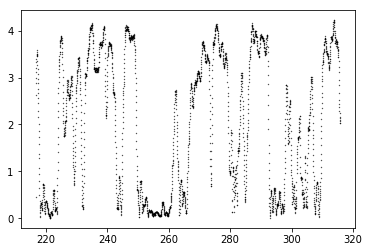

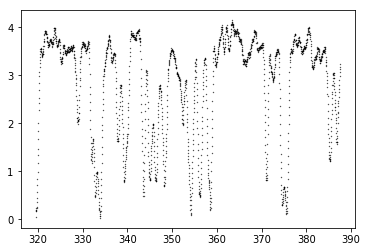

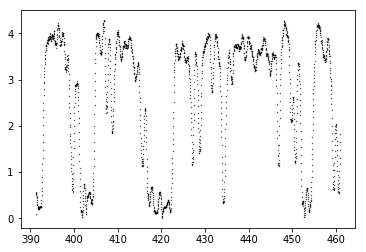

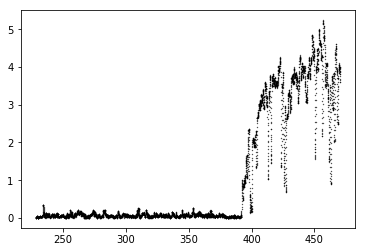

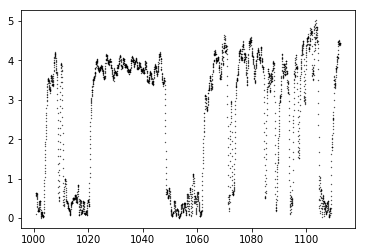

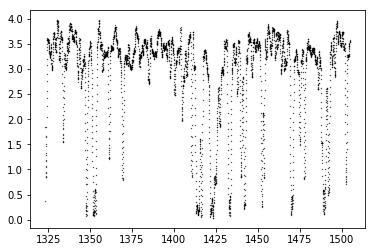

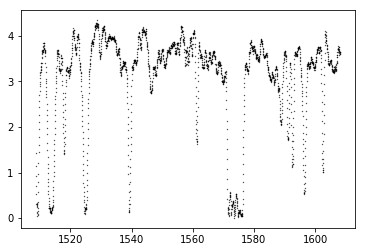

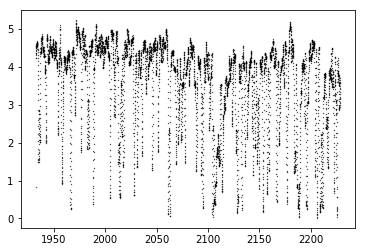

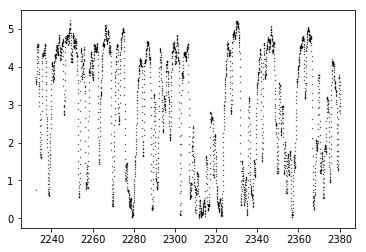

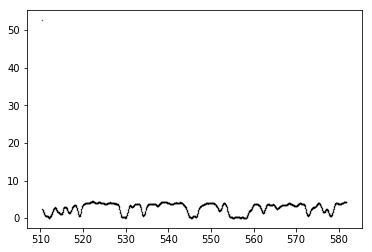

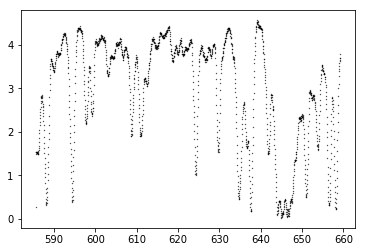

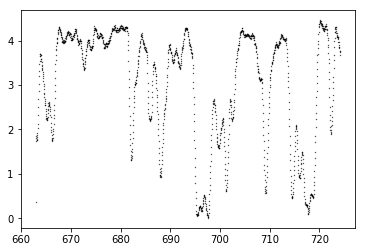

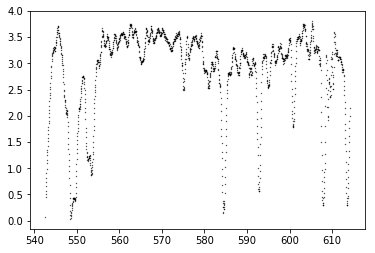

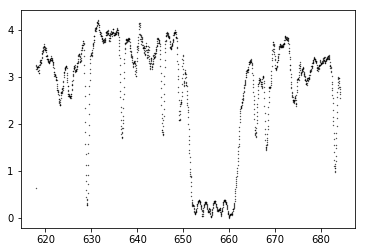

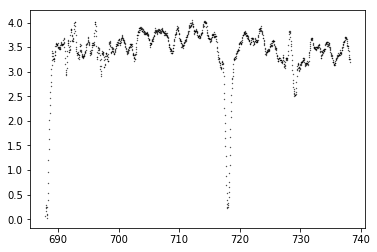

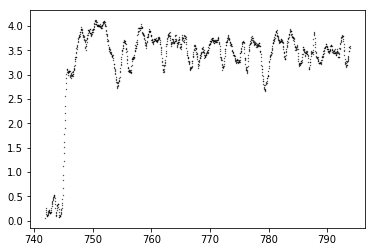

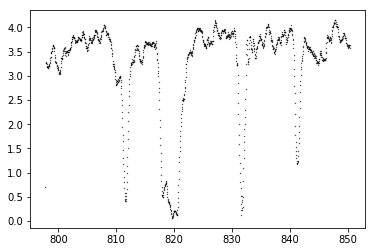

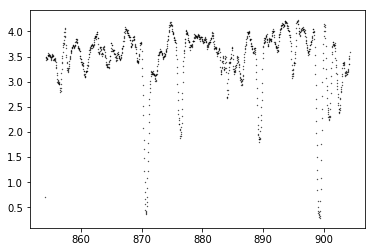

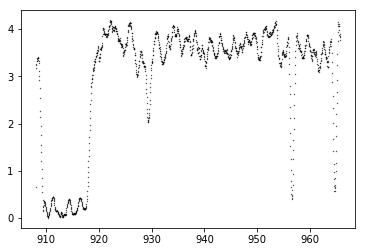

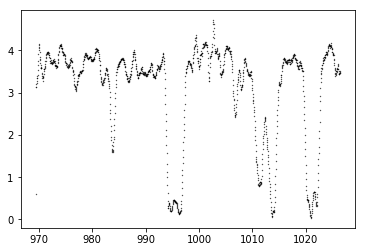

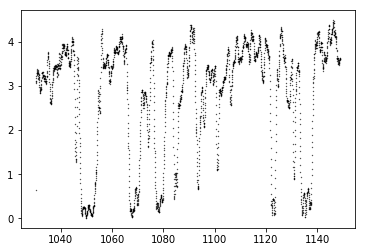

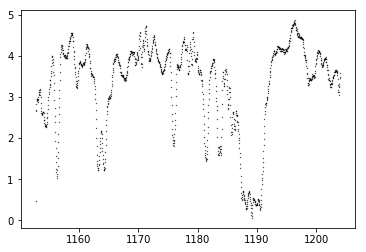

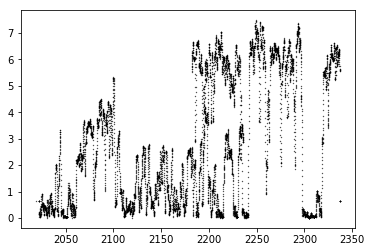

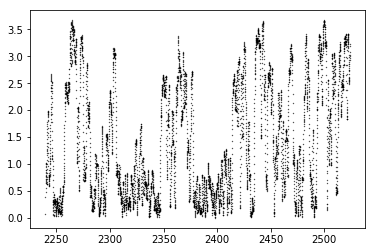

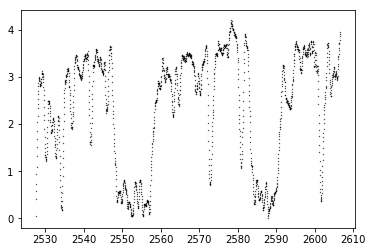

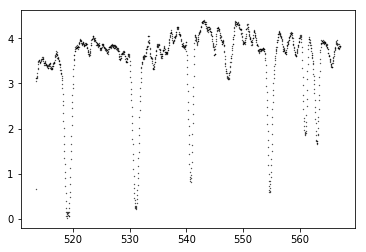

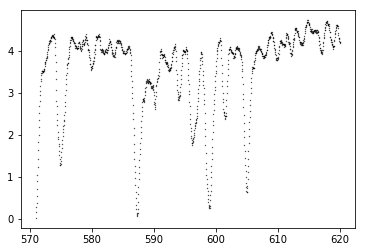

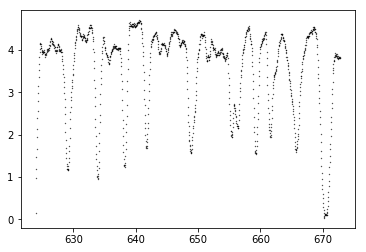

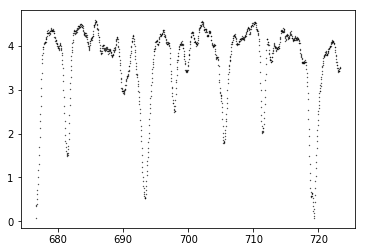

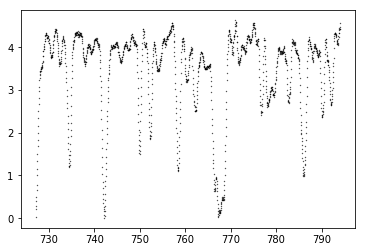

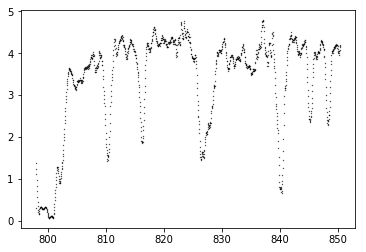

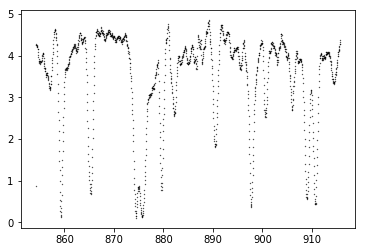

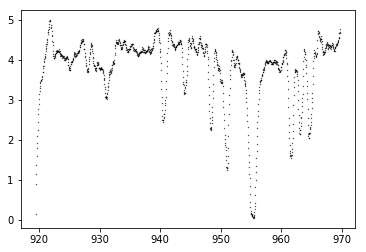

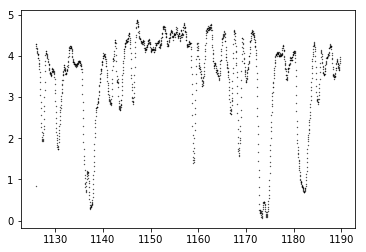

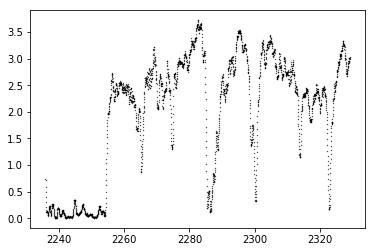

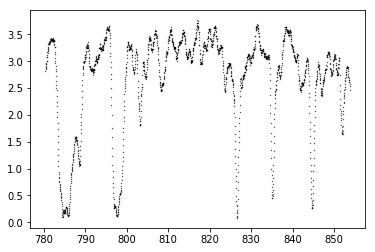

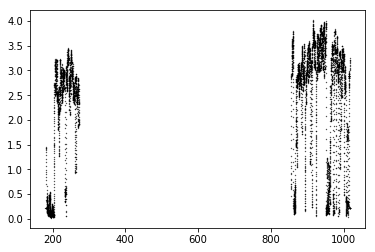

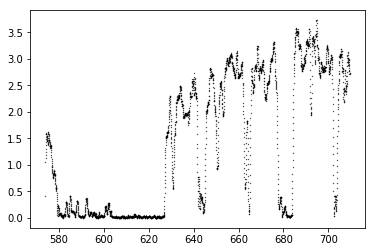

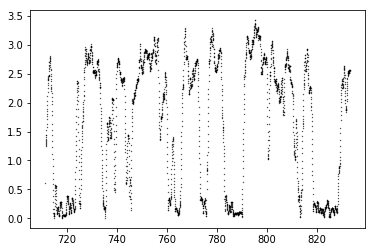

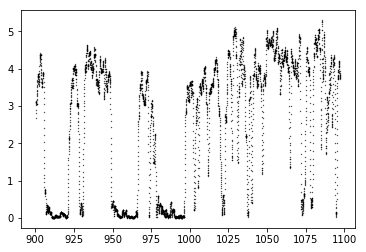

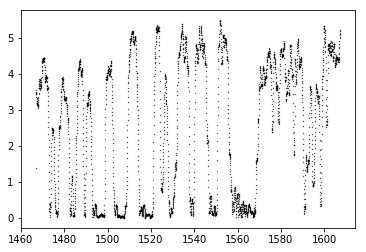

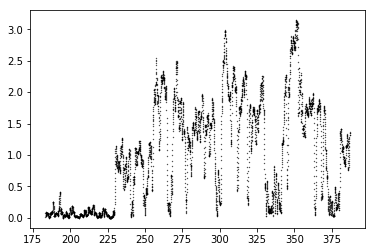

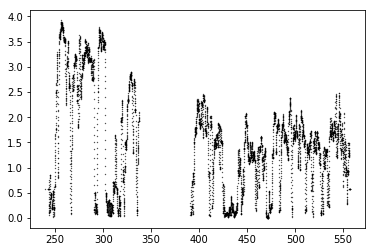

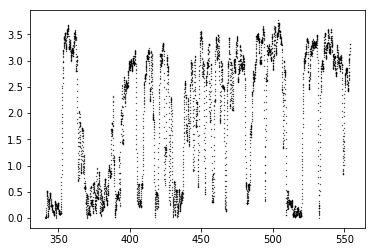

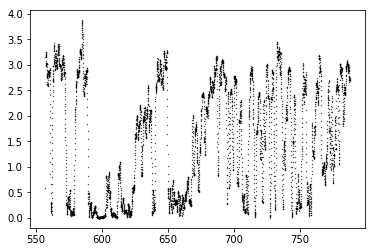

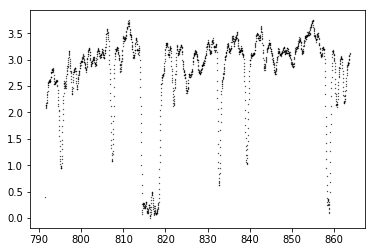

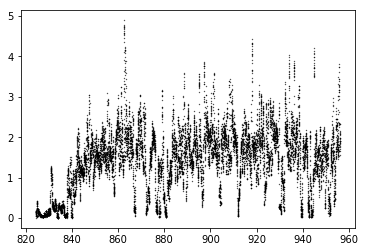

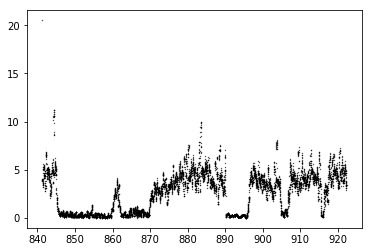

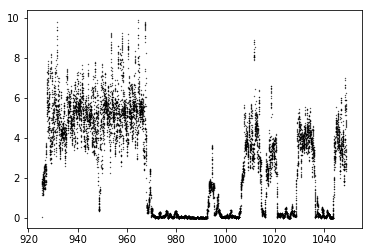

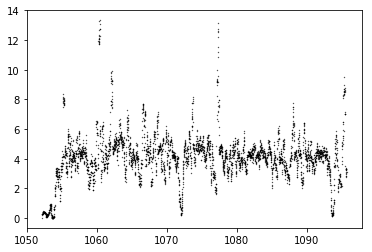

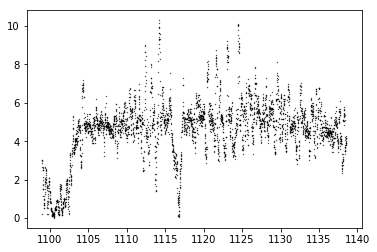

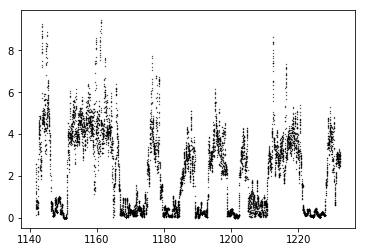

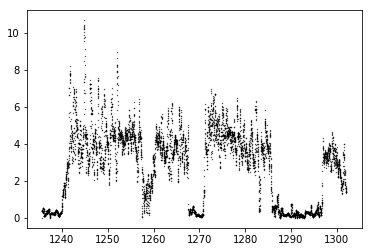

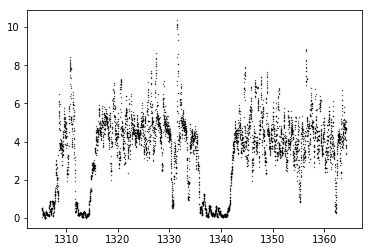

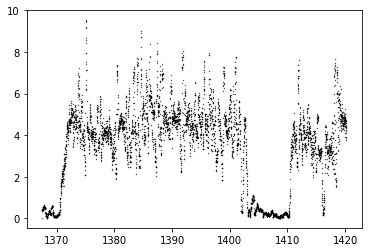

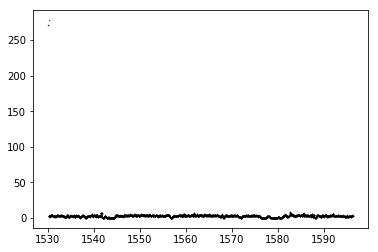

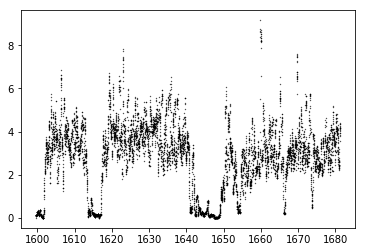

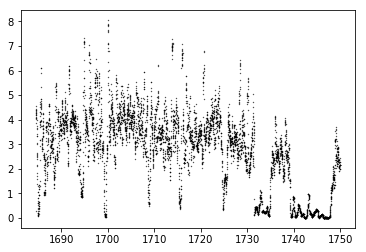

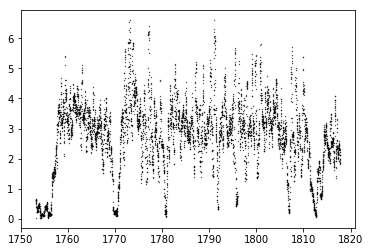

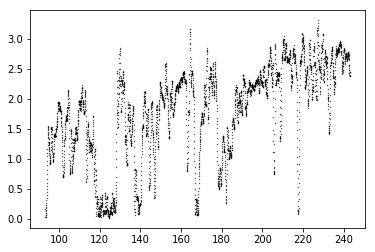

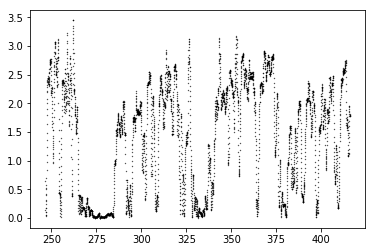

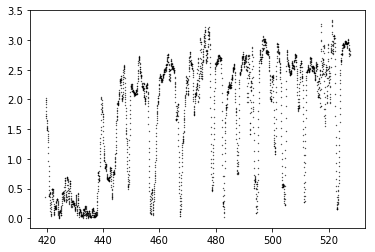

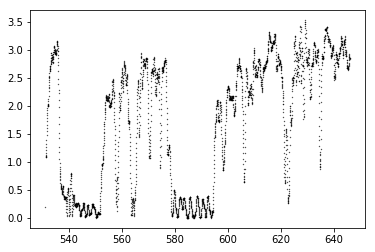

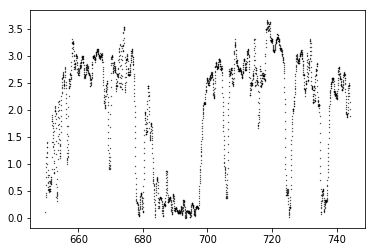

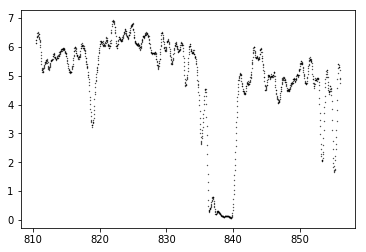

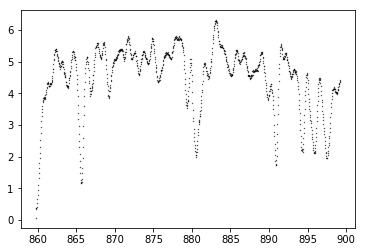

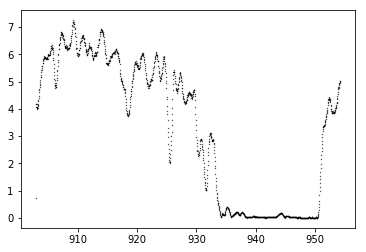

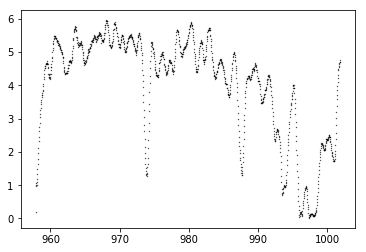

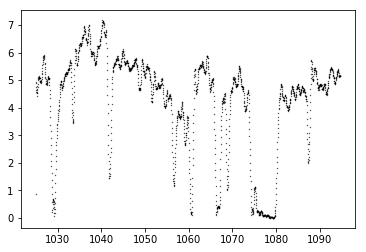

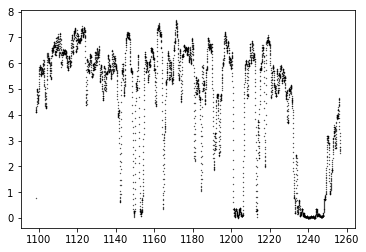

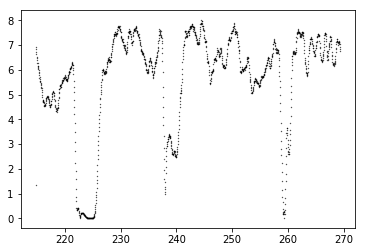

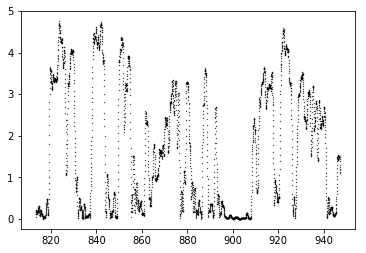

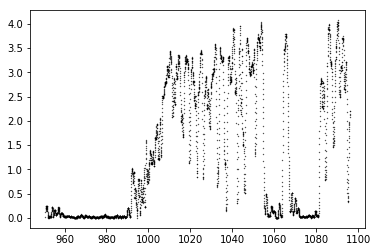

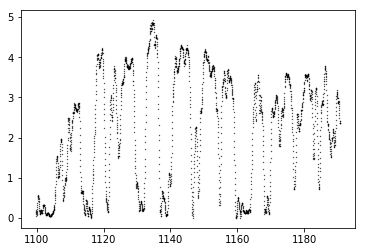

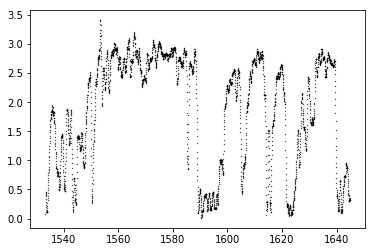

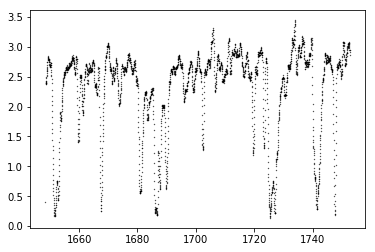

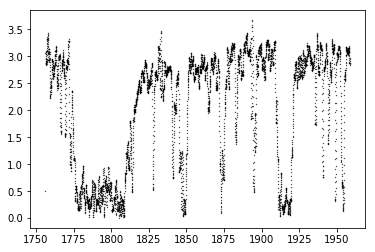

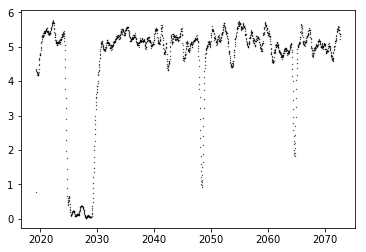

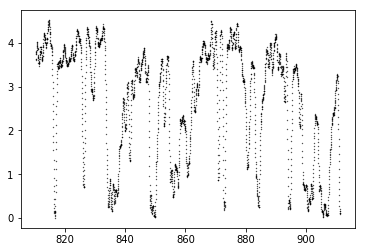

In [366]:
window = 20

for i in range(len(l_trial)-1):    
    d_v3 =[]
    
    for k in range(l_trial[i]+1,l_trial[i+1] )  :  
        
        #    #speed per trial
        if k+window  <  l_trial[i+1]:
            delta=((((df6['x_rot'][k]-df6['x_rot'][k+window])**2 + (df6['y_rot'][k]-df6['y_rot'][k+window]) **2)**0.5)/(((df6['t'][k]-df6['t'][k+window])**2)**0.5))
            d_v3.extend([(delta*100,df6['t'][k+window/2])]) #delta is between i and i+window, x is centered in frame
    plt.scatter(np.array(d_v3)[:,1], np.array(d_v3)[:,0], c='black', s=0.1, alpha=1)
    plt.show()

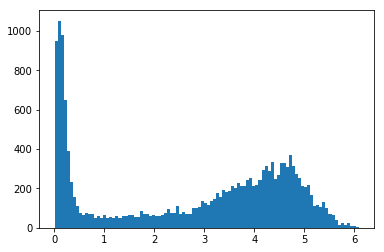

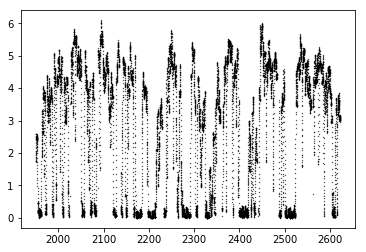

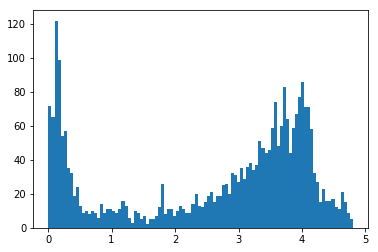

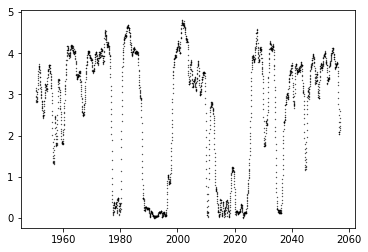

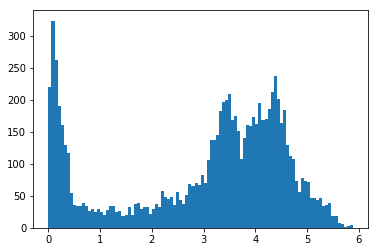

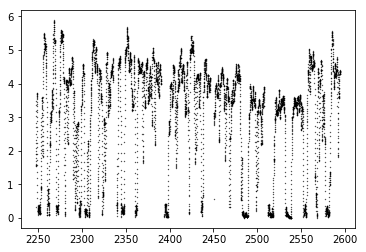

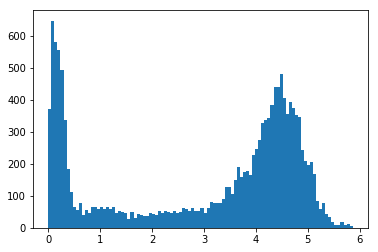

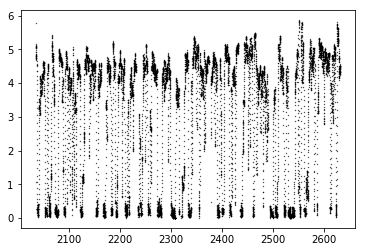

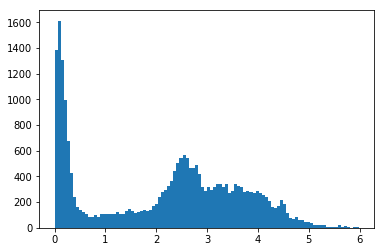

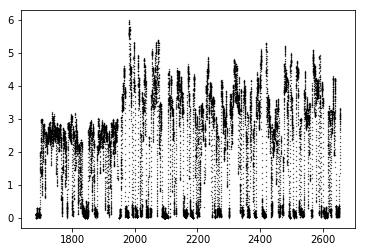

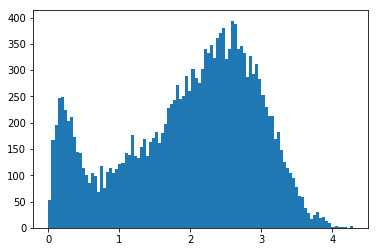

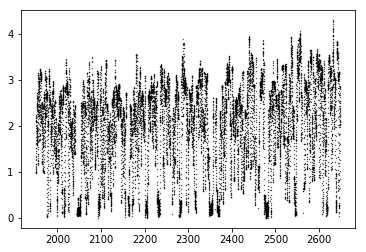

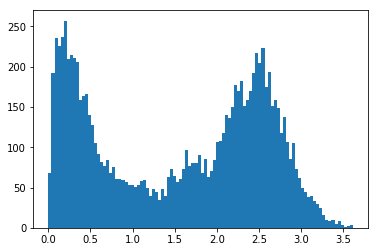

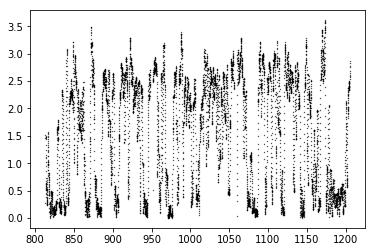

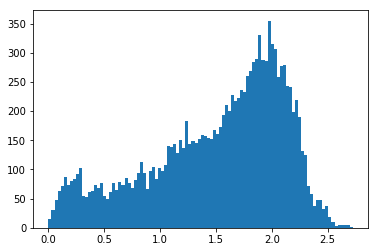

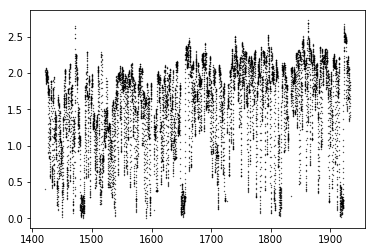

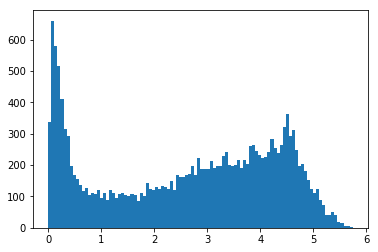

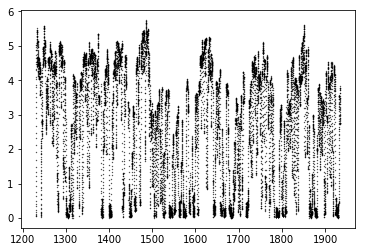

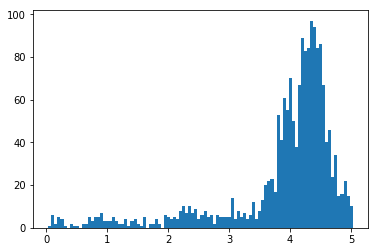

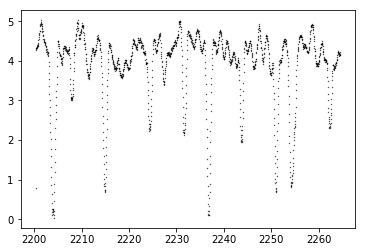

In [377]:
window = 20

for i in range (10):#(len(l_individual)-1):    
    d_v3 =[]
    
    for k in range(l_individual[i]+1,l_individual[i+1] )  :  
        
        #    #speed per trial
        if k+window  <  l_individual[i+1]:
            delta=((((df6['x_rot'][k]-df6['x_rot'][k+window])**2 + (df6['y_rot'][k]-df6['y_rot'][k+window]) **2)**0.5)/(((df6['t'][k]-df6['t'][k+window])**2)**0.5))
            if delta*100 < 8:
                d_v3.extend([(delta*100,df6['t'][k+window/2])]) #delta is between i and i+window, x is centered in frame
    plt.hist(np.array(d_v3)[:,0], bins=100)
    plt.show()
    plt.scatter(np.array(d_v3)[:,1], np.array(d_v3)[:,0], c='black', s=0.1, alpha=1)
    plt.show()

(array([1529.,  289.,  287.,  368.,  542., 1466., 1594., 1767.,  642.,
         170.]),
 array([1.93742850e-03, 5.90205446e-01, 1.17847346e+00, 1.76674148e+00,
        2.35500950e+00, 2.94327752e+00, 3.53154553e+00, 4.11981355e+00,
        4.70808157e+00, 5.29634959e+00, 5.88461760e+00]),
 <a list of 10 Patch objects>)

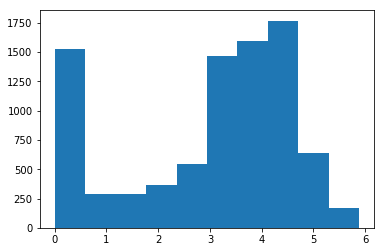

In [375]:
plt.hist(np.array(d_v3)[:,0])
#np.array(d_v2)[:,0]

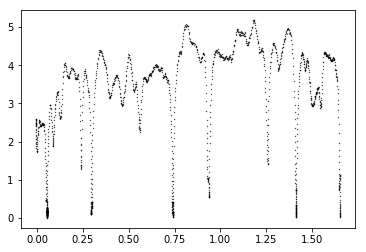

In [344]:
#plt.hist(np.array(d_v3)[0])
plt.scatter(np.array(d_v3)[:,1], np.array(d_v3)[:,0], c='black', s=0.1, alpha=1)



In [ ]:

trajectory =  df6#p1_traj # p0_traj df6 #all without noise # df3 with noise
for i in range(window,len(trajectory)): #len(df3)# df3 = +noise
    delta=((((trajectory['x_rot'][i]-trajectory['x_rot'][i-window])**2 + (trajectory['y_rot'][i]-trajectory['y_rot'][i-window]) **2)**0.5)/(((trajectory['t'][i]-trajectory['t'][i-window])**2)**0.5))
    #if d != 0.0:
        #d_v=( )
    d_v3.extend([(delta*100,trajectory['x_rot'][i-window/2])]) #delta is between i and i+window, x is centered in frame
    # *100 to get cm/s

In [298]:
nbins = 251
tmp_img = np.flipud(np.rot90(cv2.GaussianBlur(h, blur, 0)))
for i in range(0, nbins):
    max_val = np.max(tmp_img[:, i])
    tmp_img[:, i] = tmp_img[:, i] / max_val


(16865,)

In [140]:
#normalize weight of trial



19687

In [ ]:
for i in range (0,1): #(len(l_individual)-1):    
    xs = np.array(df6['x_rot'][l_individual[i]+1:l_individual[i+1]])
    ys = np.array(df6['y_rot'][l_individual[i]+1:l_individual[i+1]])

In [299]:
df6[255197: 264786]

index         x         y    z  cntr            t  nStimuli  pos0x  \
255197  873594 -0.020042  0.061640  0.0   2.0  2178.626839       3.0    0.0   
255198  873595 -0.020410  0.062899  0.0   2.0  2181.670384       3.0    0.0   
255199  873596 -0.020969  0.064745  0.0   2.0  2181.706961       3.0    0.0   
255200  873597 -0.021688  0.067139  0.0   2.0  2181.741864       3.0    0.0   
255201  873598 -0.022207  0.068923  0.0   2.0  2181.775041       3.0    0.0   
255202  873599 -0.022885  0.071309  0.0   2.0  2181.810888       3.0    0.0   
255203  873600 -0.023357  0.073091  0.0   2.0  2181.847005       3.0    0.0   
255204  873601 -0.023952  0.075418  0.0   2.0  2181.884879       3.0    0.0   
255205  873602 -0.024444  0.077229  0.0   2.0  2181.915766       3.0    0.0   
255206  873603 -0.024881  0.078902  0.0   2.0  2181.947582       3.0    0.0   
255207  873604 -0.025351  0.080935  0.0   2.0  2181.985868       3.0    0.0   
255208  873605 -0.025763  0.082897  0.0   2.0  2182.024206       3.0    0.0   
255209  873606 -0.026055  0.084345  0.0   2.0  2182.062171       3.0    0.0   
255210  873607 -0.026389  0.086213  0.0   2.0  2182.100171       3.0    0.0   
255211  873608 -0.026645  0.087603  0.0   2.0  2182.133323       3.0    0.0   
255212  873609 -0.027017  0.089461  0.0   2.0  2182.169674       3.0    0.0   
255213  873610 -0.027415  0.091363  0.0   2.0  2182.214524       3.0    0.0   
255214  873611 -0.027859  0.093443  0.0   2.0  2182.251901       3.0    0.0   
255215  873612 -0.028217  0.095096  0.0   2.0  2182.287463       3.0    0.0   
255216  873613 -0.028770  0.097575  0.0   2.0  2182.326593       3.0    0.0   
255217  873614 -0.029373  0.099988  0.0   2.0  2182.364376       3.0    0.0   
255218  873615 -0.029874  0.101860  0.0   2.0  2182.398935       3.0    0.0   
255219  873616 -0.030783  0.105145  0.0   2.0  2182.445111       3.0    0.0   
255220  873617 -0.031360  0.107197  0.0   2.0  2182.481073       3.0    0.0   
255221  873618 -0.032159  0.109932  0.0   2.0  2182.515586       3.0    0.0   
255222  873619 -0.032708  0.111825  0.0   2.0  2182.552111       3.0    0.0   
255223  873620 -0.033467  0.114415  0.0   2.0  2182.589223       3.0    0.0   
255224  873621 -0.034057  0.116397  0.0   2.0  2182.625181       3.0    0.0   
255225  873622 -0.034869  0.119008  0.0   2.0  2182.667056       3.0    0.0   
255226  873623 -0.035742  0.121507  0.0   2.0  2182.705037       3.0    0.0   
...        ...       ...       ...  ...   ...          ...       ...    ...   
264756  946749  1.019066 -1.421031  0.0   2.0  2235.281051       3.0   -0.0   
264757  946750  1.018479 -1.421875  0.0   2.0  2235.322107       3.0   -0.0   
264758  946751  1.017913 -1.422798  0.0   2.0  2235.363990       3.0   -0.0   
264759  946752  1.017437 -1.423818  0.0   2.0  2235.399854       3.0   -0.0   
264760  946753  1.017133 -1.424651  0.0   2.0  2235.435701       3.0   -0.0   
264761  946754  1.016764 -1.425808  0.0   2.0  2235.471506       3.0   -0.0   
264762  946755  1.016515 -1.426697  0.0   2.0  2235.506503       3.0   -0.0   
264763  946756  1.016211 -1.427899  0.0   2.0  2235.541692       3.0   -0.0   
264764  946757  1.016007 -1.428782  0.0   2.0  2235.576338       3.0   -0.0   
264765  946758  1.015783 -1.429663  0.0   2.0  2235.610950       3.0   -0.0   
264766  946759  1.015410 -1.430843  0.0   2.0  2235.649504       3.0   -0.0   
264767  946760  1.014982 -1.432021  0.0   2.0  2235.686617       3.0   -0.0   
264768  946761  1.014657 -1.432890  0.0   2.0  2235.723128       3.0   -0.0   
264769  946762  1.014078 -1.434273  0.0   2.0  2235.771635       3.0   -0.0   
264770  946763  1.013456 -1.435583  0.0   2.0  2235.821011       3.0   -0.0   
264771  946764  1.012937 -1.436599  0.0   2.0  2235.857749       3.0   -0.0   
264772  946765  1.012546 -1.437325  0.0   2.0  2235.891639       3.0   -0.0   
264773  946766  1.011967 -1.438354  0.0   2.0  2235.931288       3.0   -0.0   
264774  946767  1.011351 -1.439410  0.0   2.0  2235.968982 